# Basics

Scikit-learn is a python machine learning library, which means if we have data, psychic learn helps us build machine learning models to make predictions or learn patterns within that data and then make predictions. 


It also implements tools to help us evaluate those predictions.c

Built on NumPy and Matplotlib (and Python)

Has many in-built machine learning models.

Methods to evaluate your machine learning models.

Very well-designed API

This notebook outlines the content convered in the Scikit-Learn Introduction.


It's a quick stop to see all the Scikit-Learn functions and modules for each section outlined.

What we're covering follows the following diagram detailing a Scikit-Learn workflow.

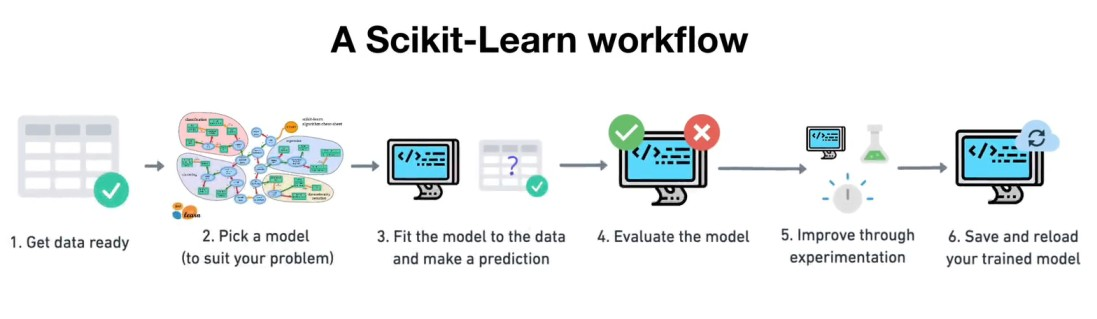



## Terminologies in Sklearn

* **Estimators** in Sklean is referred to "machine learning models", "algorithms".
* Within those estimators, you have 
    - **classifiers** which is a classification model 
    - **regressors** which is a regression model
* **Classification problem** - predicting a category (heart disease or not)
    * Sometimes you'll see clf (short for classifier) used as a classification estimator
* **Regression problem** - predicting a number (selling price of a car)
*  If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
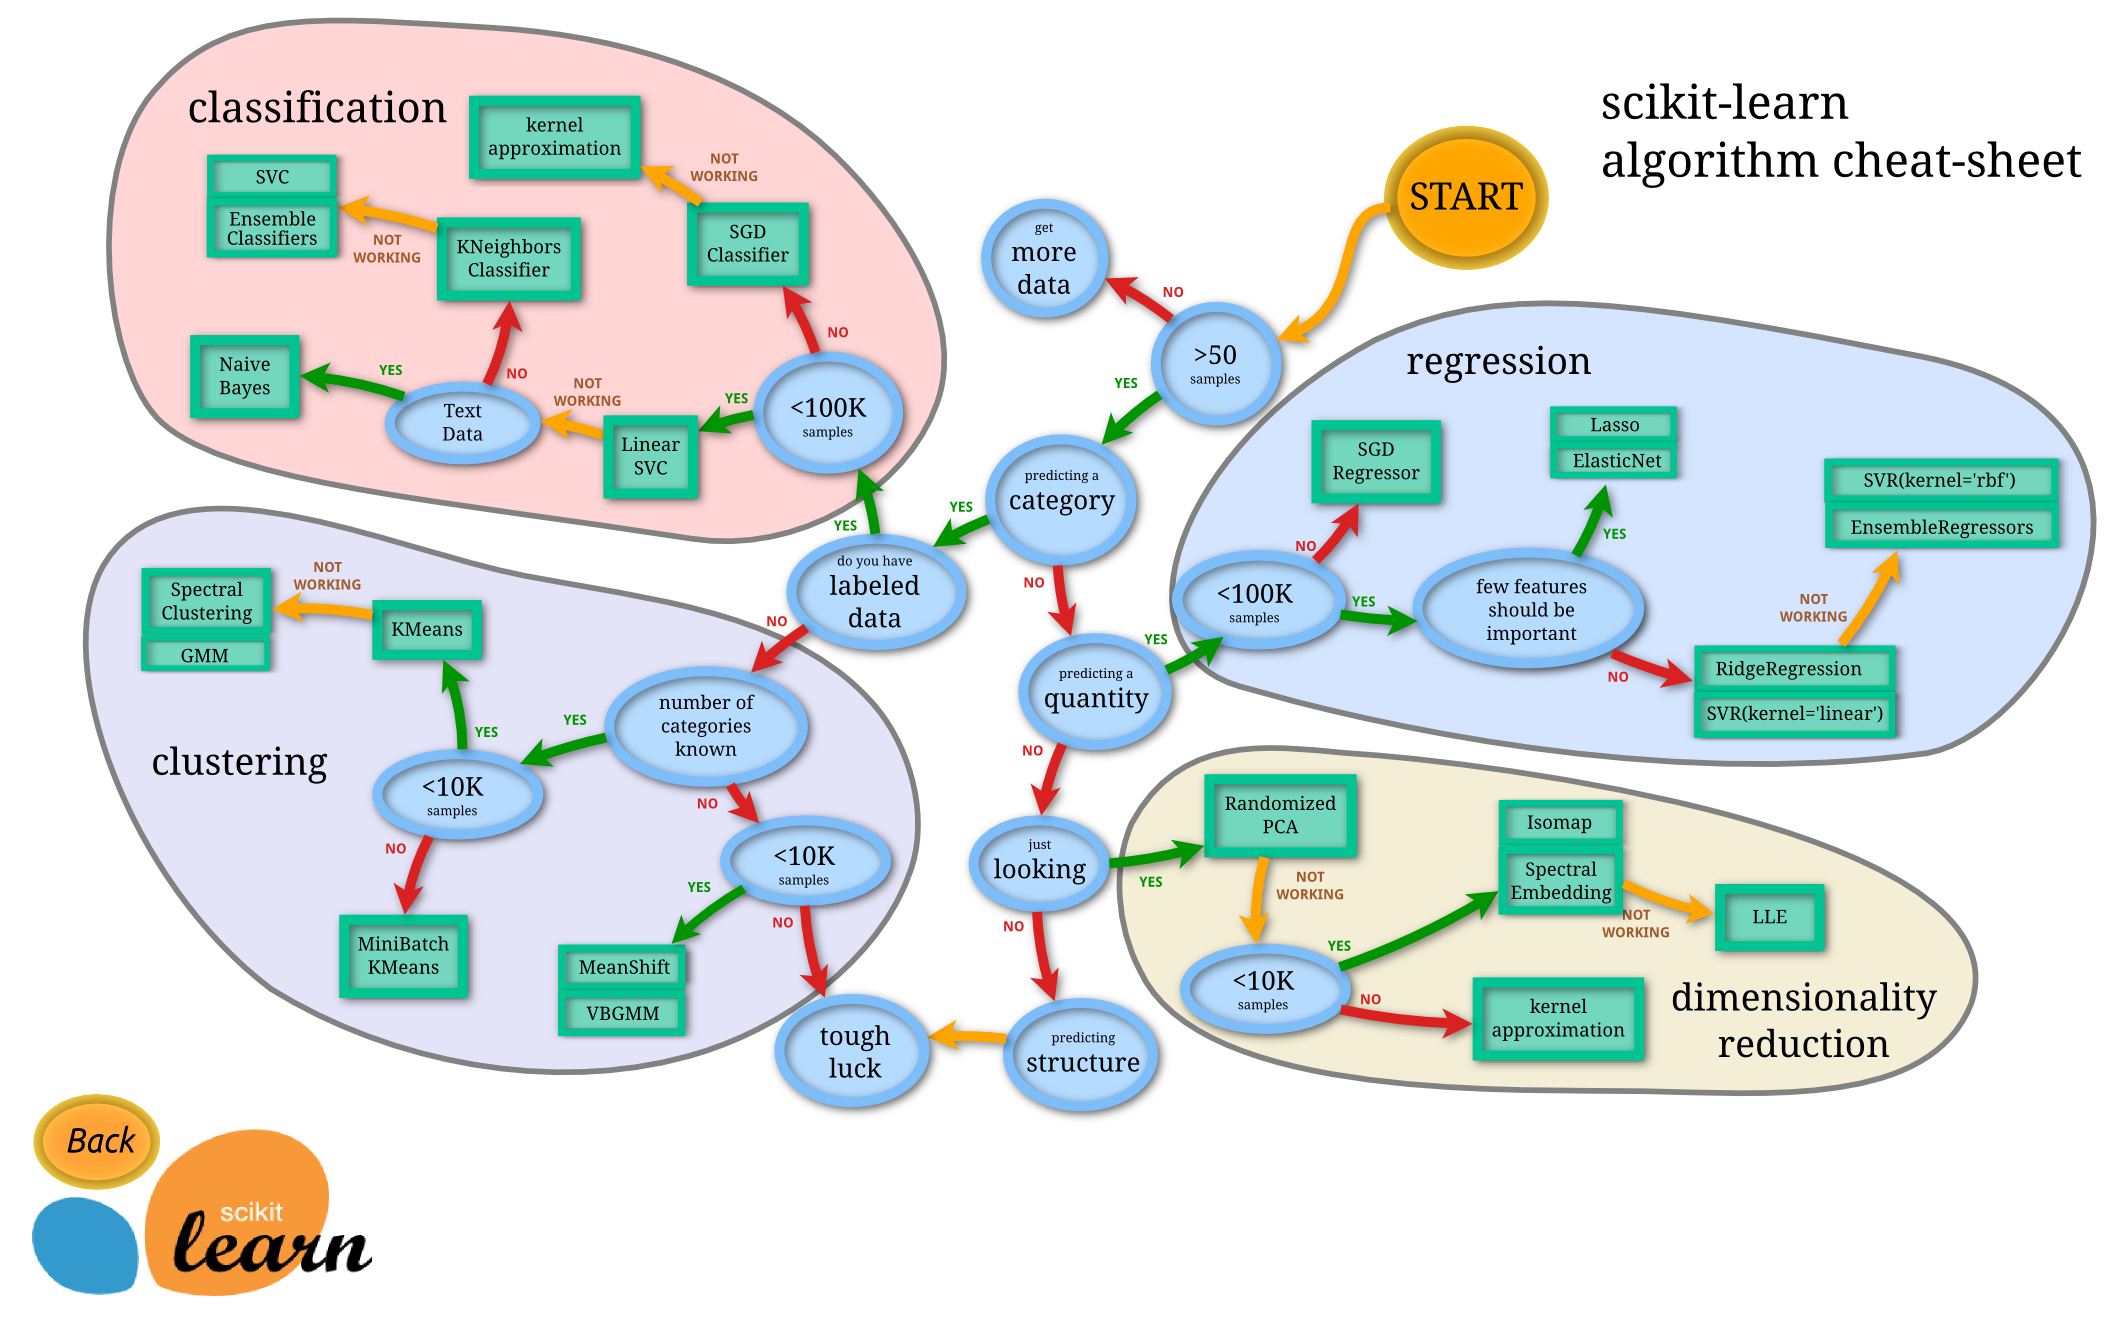

## 0. Standard library imports

For all machine learning projects, you'll often see these libraries (Matplotlib, NumPy and pandas) imported at the top.


In [295]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We'll use 2 datasets for demonstration purposes.
* `heart_disease` - a classification dataset (predicting whether someone has heart disease or not)

* `boston_df` - a regression dataset (predicting the median house prices of cities in Boston)

In [296]:
# Classification data
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

## 1. Get the data ready
Split data into X & y


In [297]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

## 2. Pick a model/estimator (to suit your problem)
To pick a model we use the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

<img src="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/images/sklearn-ml-map.png" width=400/>

**Notes:** 
1. Scikit-Learn refers to machine learning models and algorithms as estimators.
2. "Hyperparameters" are like dials on a model that you can tune to make it better or worse


In [298]:
# Random Forest Classifier (for classification problems)
# "RandomForestClassifier" from sklearn.ensemble is a classification ML model. So, it is capable of learning patterns
# and data and then classifying whether a sample (i.e a row) is one thing or another thing.

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # Instantiating a Random Forest Classifier (clf short for classifier)

In [299]:
# get_params() will list the hyperparameters. For now, we'll keep default hyperparameters.

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the data and make a prediction

In [300]:
# We need to split our data into training and test, we can do that using 'train_test_split'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 0.2 = 20% will be used for testing & 80% for training

In [301]:
# we want now the classification model to find the pattern within our training data. Basically our model is fitting to the data.
clf.fit(X_train, y_train);

In [302]:
# make a prediction -- !!!! We cannot make a prediction on things that aren't the same shape !!!! 
# y_preds = clf.predict(np.array([0, 2, 3, 4]))   # ValueError: Expected 2D array, got 1D array instead:

In [303]:
# make a prediction
y_preds = clf.predict(X_test)

y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## 4. Evaluate the model

Every Scikit-Learn model has a default metric which is accessible through the `score()` function.

However there are a range of different evaluation metrics you can use depending on the model you're using.

A full list of evaluation metrics can be [found in the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [304]:
# **** 4. Evaludate the model on the training data and test data ****
# All models/estimators have a `score()` method
# clf.score returns the mean accuracy on the given test data and labels.
# Below we got 1.0 on the training data means the model has done 100% on our training data.
# It means the model has found patterns in the training data so well that it's got 100%
# Because it got trained on X (which is features matrix) as well as Y (which is label), so it had a chance to correct itself
# if it got something wrong, but it performs 83% accuracy means it gets 3 out of 4 predictions correct on the test data because 
# it's never seen that data nor has it ever seen the labels.

# Checking the score on training data
clf.score(X_train, y_train)  # 1.0

1.0

In [305]:
# Checking the score on test data
clf.score(X_test, y_test)  # 0.819672131147541 (83%)

0.7868852459016393

In [306]:
# Different classification metrics

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))  # We are going to get little more insight rather than just accuracy.

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))  # 0.819672131147541

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))  # [[15  6] [ 5 35]]

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

0.7868852459016393
[[18  5]
 [ 8 30]]


## 5. Improve through experimentation

Two of the main methods to improve a models baseline metrics (the first evaluation metrics you get).

From a data perspective asks:
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:
* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the **hyperparameters** be tuned to make it even better?

**Hyperparameters** are like settings on a model you can adjust so some of the ways it uses to find patterns are altered and potentially improved. Adjusting hyperparameters is referred to as hyperparameter tuning.

In [307]:
np.random.seed(42) # so that our results are replicable

for i in range(10, 100, 10):
    # Loop through 10,20 and all the way up to 100 estimators because we're trying to figure out if we can improve
    # our model by adjusting one of our hyper parameters.
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)  # learning on training data
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%') # evaluate on test data
    print("")

# We can see below that 20 estimators is the best for our model because they've got the highest accuracy.

Trying model with 10 estimators...
Model accuracy on test set: 77.05%

Trying model with 20 estimators...
Model accuracy on test set: 75.41%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



## 6. Save and reload your trained model
You can save and load a model with `pickle`.

In [308]:
# **** 6. Save a model and load it ****
# We can save the model using pickle library
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [309]:
# Load the saved model
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)  # 0.8524590163934426 same score as our recently trained model.

0.7868852459016393

## 1. Getting our data ready to be used with Machine Learning

Three main things we have to do:
1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to non-numerical values (also called as feature encoding)

In [310]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [311]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [312]:
 # Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [313]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((242, 13), (61, 13), (242,), (61,))  # 13 is the columns (i.e. features matrix) except target column

((242, 13), (61, 13), (242,), (61,))

# Clean Data → Transform Data → Reduce Data
Before we even create ML models, we need to do the below steps: 
1. Clean Data: We need to clean our data. Sometimes we want to remove/replace data as we might have tables with missing values, missing labels, etc. So, we might remove row/column or we might calculate some sort of average e.g. fill an empty price list to an average for a house. 
2. Transform Data: We want to transform data into some form that computer understands. We need to convert some of our information into numbers. E.g. The price of a house or salary are numbers are easy for us to create models with because understand numbers easily but it might find hard to understand what a color is, so we transform colors into numbers like RGB colors. Another example is tranforming heart disease is there or not to 1s and 0s.
3. Reduce Data: If we're able to get the same result on less data, that saves us money. Sometimes, the idea of data reduction is called as `Dimensionality Reduction` or `Column Reduction`.

## 1.1 Make sure it is all numerical

In [314]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv')
len(car_sales)  # 1000
car_sales.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

We are going to predict the "Price" of the car given some attributes about it

In [315]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [316]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [317]:
# Build Machine Learning model

# RandomForestClassifier is used for predicting a classification problem.
# RandomForestRegressor same as RandomForestClassifier but it can predict a number. We are trying to predict "Price" of a car.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [318]:
# If I try to fit my data to model, I get ValueError because my ML model cannot deal with strings.

# model.fit(X_train, y_train)  # ValueError: could not convert string to float: 'Toyota'

#### One Hot Encoding

Before we move on let's see what is `One Hot Encoding`
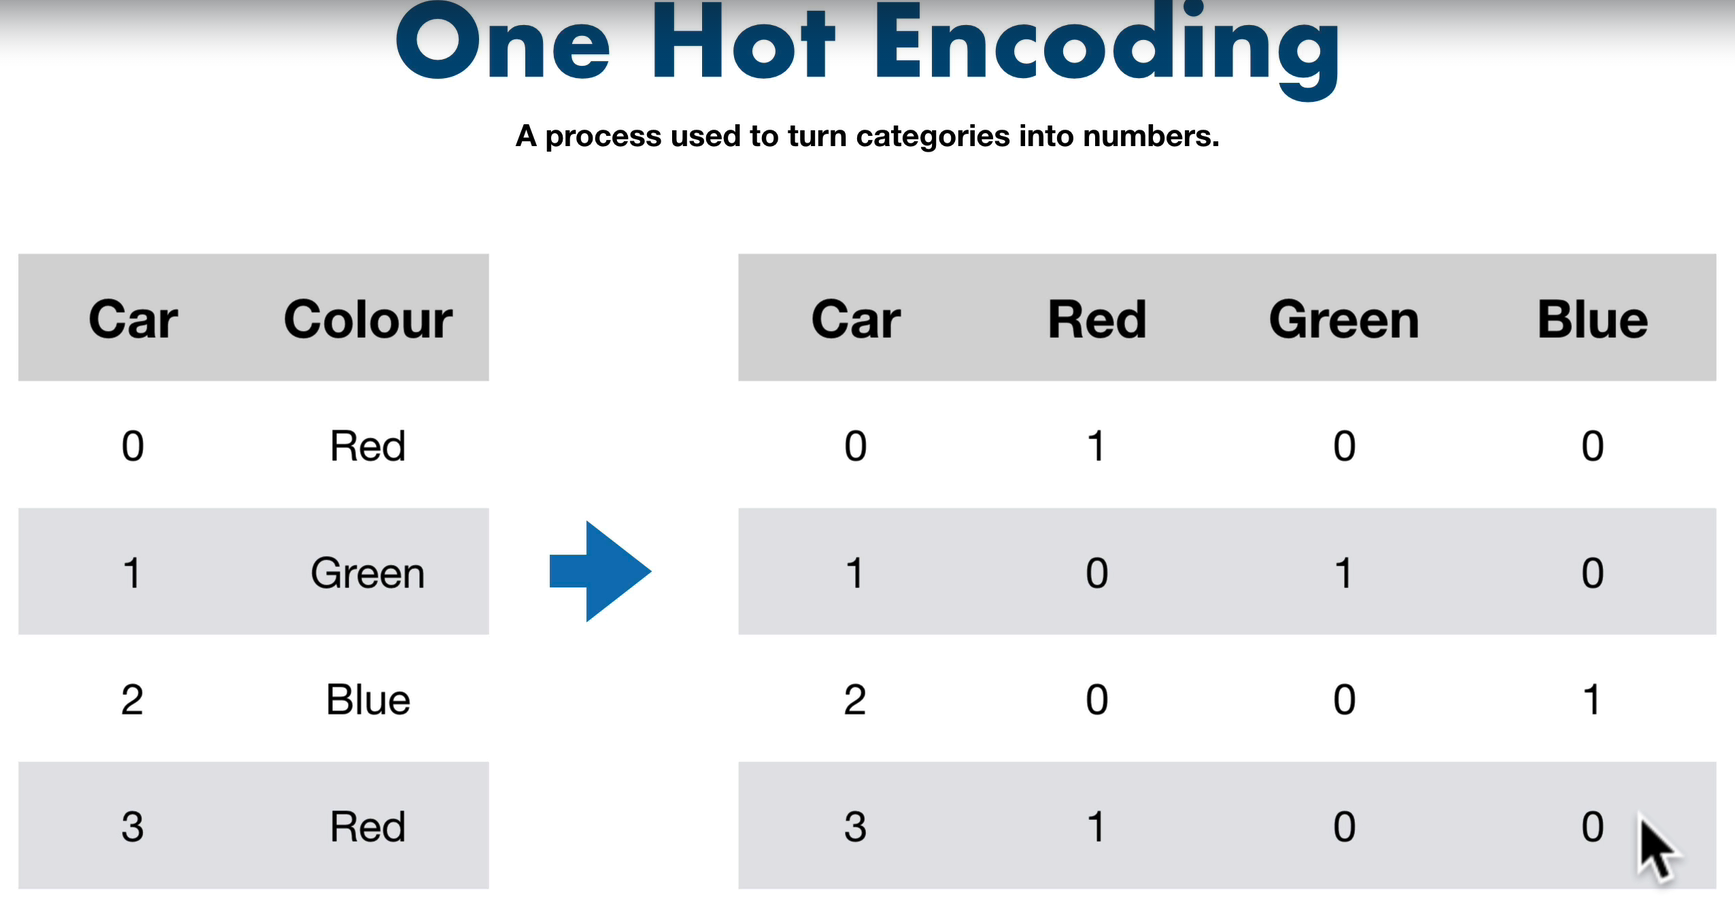
- Let's say we have four cars. So cars 0, 1, 2 and 3 and that colors are Red, Green, Blue and Red. 
- If we want it to one hot encode this, let's say we want to turn the 'Color' column into numbers. Below is what we will do.
- We've got car 0 and the color of car 0 is Red, so to transform our categories into numbers. So this is one hot encoding. So because zero, the color is red, it gets a 1 and it gets a 0 for the other two categories. The same goes on for other values.
- If you don't understand, watch this - https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17322930?start=689#notes

In [319]:
# Let's turn categories (Make, Color, Doors) into numbers. Specifically, we say convert those to one hot encoded variables.
# Why Doors? "car_sales['Doors']" is numerical but it is also categorical because
# let's say cars with 4 doors will fit into 856 cars which is one category, cars with 5 doors can fit into another category, etc

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough" # pass the list of features we would like to transform
)

# The ColumnTransformer takes the OneHotEncoder and applies it to the categorical_features and for the remainder of the 
# columns just passthrough, meaning don't do anything to those.

transformed_X = transformer.fit_transform(X)  # Fitting our 'transformer' to our X data. ie. Transform X into numbers
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [320]:
# Let's put into dataframe to see it clearly. What we have done is that we've encoded the different parameters of each row 
# into 0s and 1s. So, our data is all numerical.
pd.DataFrame(transformed_X)

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [321]:
# Not Recommended: One more way to transform Make, Colors and Doors into numbers

# we will use pd.get_dummies which is similar to one hot encoding
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies  # Note that Doors column is numerical and this didn't work properly here like OneHotEncoder

Doors  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  Colour_Black  \
0        4         0           1            0            0             0   
1        5         1           0            0            0             0   
2        4         0           1            0            0             0   
3        4         0           0            0            1             0   
4        3         0           0            1            0             0   
..     ...       ...         ...          ...          ...           ...   
995      4         0           0            0            1             1   
996      3         0           0            1            0             0   
997      4         0           0            1            0             0   
998      4         0           1            0            0             0   
999      4         0           0            0            1             0   

     Colour_Blue  Colour_Green  Colour_Red  Colour_White  
0              0             0           0             1  
1              1             0           0             0  
2              0             0           0             1  
3              0             0           0             1  
4              1             0           0             0  
..           ...           ...         ...           ...  
995            0             0           0             0  
996            0             0           0             1  
997            1             0           0             0  
998            0             0           0             1  
999            1             0           0             0  

[1000 rows x 10 columns]

In [322]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)  # NOTE: We are passing transformed_X

model.fit(X_train, y_train)

RandomForestRegressor()

In [323]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some value (also known as **imputation**). 
2. Remove the samples with missing data altogether.

**Imputation vs Feature Engineering/Feature Encoding**
- Process of filling missing values is called as `Imputation`. That is, find missing data and fill out with something or calculate something to fill out with is called as "imputation"
- Process of turning your non-numerical values into numerical values is referred to as `Feature Engineering` or `Feature Encoding`.

In [324]:
# Import the car sales missing data
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()  # to check how many missing values are there in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [325]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [326]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)  # Fitting our 'transformer' to our X data. ie. Transform X into numbers
transformed_X 

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill Missing Data With Pandas
- There is no perfect way for filling the missing data like you had really value.
- E.g.1 With missing value in a Numerical column, we might fill it with the mean like the average of that column. For instance, below we can see that for Odometer (KM) we have filled missing values with mean. 
- E.g.2 However, for Doors we see that the car_sales_missing's Door's value_counts() has more number of 4, so we will put 4. The reason is, let's say cars with 4 doors will fit into 856 cars which is one category, cars with 5 doors can fit into another category, etc. So, Doors is a separate category, so it is better to not use mean here.

NOTE: We won't fill the missing data for Price column because that is what we are trying to predict

In [327]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the "Odometer" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [328]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [329]:
# Remove rows with missing Price values

# Above we saw that won't fill the missing data for "Price" column because is what we are trying to predict, so what we will
# do is to remove those rows that has missing "Price" values. We are going to lose some data but it's hard to predict 
# something when it doesn't have a label.

car_sales_missing.dropna(inplace=True)

In [330]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [331]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [332]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)  # Fitting our 'transformer' to our X data. ie. Transform X into numbers
transformed_X.toarray() # to see something visual, we can use .toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

#### Feature Scaling
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called **Feature Scaling**.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

* **Normalization (also called min-max scaling)** - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

* **Standardization** - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

A couple of things to note.
* Feature scaling usually isn't required for your target variable.
* Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

**Extra reading**  
* For further information on this topic, I'd suggest the following resources.
* https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310
* https://benalexkeen.com/feature-scaling-with-scikit-learn/
* https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Challenge

After reading up on feature scaling, a good idea would be to practice it on one of the problems you're working on and see how it affects the results. If you find anything interesting, be sure to share it.

Thank you to Sid and Shubhamai for suggesting resources. If you have anything you think should be added, please let us know.

#### Option 2: Fill missing values with Scikit-learn

In [333]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [334]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [335]:
# First we want to get rid of rows which don't have "Price" values
# Split into subset. 
car_sales_missing.dropna(subset=['Price'], inplace=True) # Removes the 'Price' rows that has NaN values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [336]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [337]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

##### What is SimpleImputer?
- Find missing data and fill out with something or calculate something to fill out with is called as **imputation** and that is what **SimpleImputer** does
- Fill Categorical values with 'missing' & numerical values with mean

##### What is fit_transform and transform? Why we use fit_transform() on training data but transform() on the test data?
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

- fit_transform is used on the training data because it needs to learn the parameters of the transformation (e.g. mean and standard deviation for standardization) and then apply the transformation.
- transform is used on the test data because the transformation has already been learned on the training data, so it only needs to be applied to the test data using the learned parameters.
- It's like when you learn a new recipe, you have to try it out and adjust the ingredients to your taste. Once you've learned the recipe and you know the right amount of ingredients, you can make it again easily without adjusting the ingredients.
- You can think of fit_transform as "learning and applying" and transform as "just applying".
- You do it separately to avoid data leakage and biases

In [338]:
# Fill missing values with Scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
"""
Below we are saying to keep the strategy for every value as constant and fill value either missing, 4 or mean.
The SimpleImputer class takes an argument called 'strategy'. If the 'strategy' is 'constant', we need to fill missing values 
using 'fill_value'
"""
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')  # cat means categorical
door_imputer = SimpleImputer(strategy='constant', fill_value=4) 
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [339]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [340]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [341]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [342]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [343]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [344]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

**Note**


The model score above is 21% which is less than the previous model 32%. That is because our previous model was built on 1000 samples and this recent model we built has only 950 samples which is why it has done slightly worse. 



## 2. Choosing the right estimator/algorithm for your problem

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


* The above is the data we get from fetch_california_housing dataset.
* The "feature_names" array is the column names and the relevant data is there in the "data" array
* The "target_names" is another column for which the value will be there in the "target"
* **We want to use the features to predict the target, which is MedHouseVal**
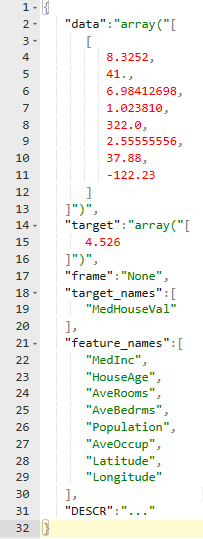


Basically, below is what we need to do initially.

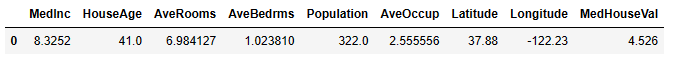

If you want to know what each column does, read the below documentation.

In short, each row shows a Median House Value. Eg. 4.526 means 4.526 times 100,000 which is 452,600

#### Documentation

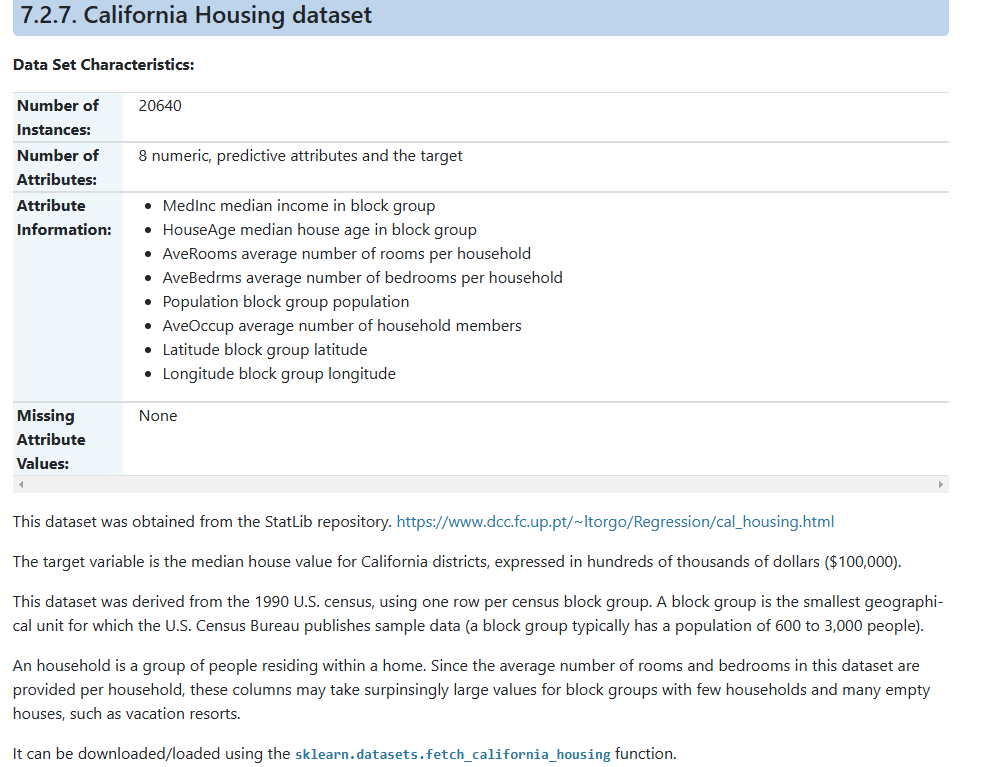

In [345]:
# Ge California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [346]:
housing_df = pd.DataFrame(housing['data'])
housing_df

0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]

In [347]:
# Let's add column names
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [348]:
# Adding "MedHouseVal" column. The value of that is there in the housing['target'] (NOTE: not housing_df['target'])
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [349]:
# We will rename MedHouseVal with target
housing_df = housing_df.rename(columns={"MedHouseVal": "target"})
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

##### Now how do we predict the model?

We will use scikit machine learning map (see below SS)

Now we are stuck in deciding whether "few features should be important?" Because we don't know which one are important and which ones are not. So best thing is to experiment.

So, first let's assume that "few features should be important?" as No. Let's do `RidgeRegression`

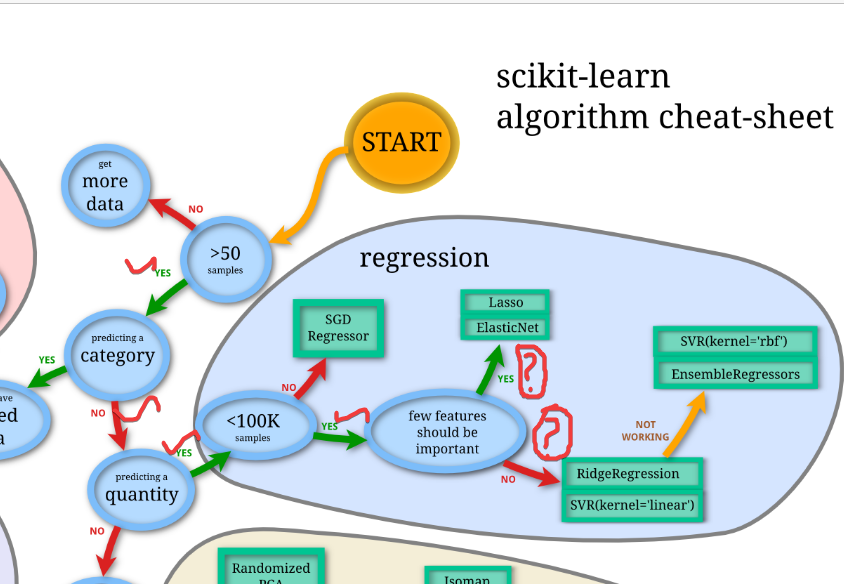

In [350]:
# Import algorithm/estimatror
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440126

**What is `model.score` for regression models?**
- In simple terms, `model.score()` tells you how well your model is able to predict the target variable based on the input variables. If the score is close to 1, it means that the model is doing a good job at fitting the data, and if the score is close to 0, it means that the model is not a good fit for the data.
- `model.score()` calculates the performance of the model on the provided data. The default evaluation metric for **regression models** in scikit-learn library is R-squared (or R²).
- R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (the variable you're trying to predict) that is predictable from the independent variables. It ranges from 0 to 1, where a higher value indicates a better fit.
- **NOTE**: You can get negative (-ve) score.
- Let's say that your y_test.mean()'s value is same for all the y_test then your model.score() would be 0.0. and if it predicted the y_test perfectly, it would get score of 1.0. It is similar to accuracy, model that predicts poorly in classification gets 0.0 and everything correct then 1.0. (For demo of 0.0 and 1.0, see "Regression model evaluation metrics"'s R^2 section

Our model gave 57%. How do we improve our machine learning model?

1. Add more data
2. Choose different model and try it out. How about we try an ensemble model?c  

#### What is Ensemble?
An ensemble is combination of smaller models to try and make better predictions than just a single model.

Definition:
- The goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator. NOTE: generalizability is the ability for a machine learning model to predict accurately on unseen data

**The key take away from an ensemble model compared to other models is that it combines the predictions of several models**

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

##### RandomForestAlgorithm
- A very popular Sklearn's ensemble model is **RandomForest** algorithm
- RandomForest is based on decision trees.
    - Decision trees is you start with something and you go yes-no, yes-no, yes-no. RandomForest is a combination of lots and lots of decision trees
    
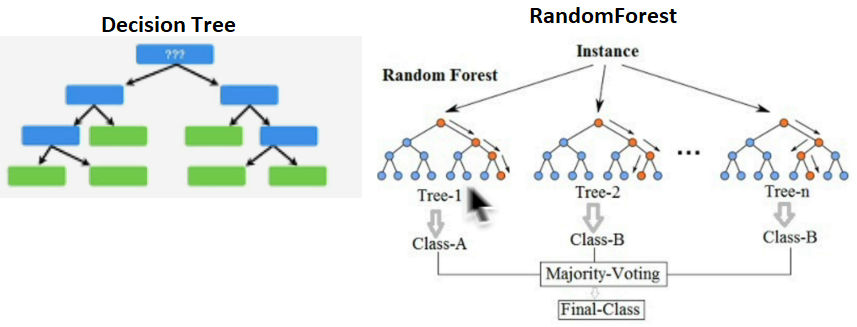
- In the above RHS diagram, we start with an **Instance** (which is one single sample) and then we make a decision and we want to classify into multiple Trees and then assign classes to it like class-A, class-B, etc. and it has got a Final-Class. 
- So, it combines decision of multiple trees and then it combines into "Majority-Voting" and it picks the Final-Class.

**NOTE**: Above example is for classification but you can do the same thing for Regression and we can do this in Sklearn using https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

- RandomForestRegressor has n_estimators=100 which means, by default, if we use this model, it's actually 100 different models predicting on what we want it to break down

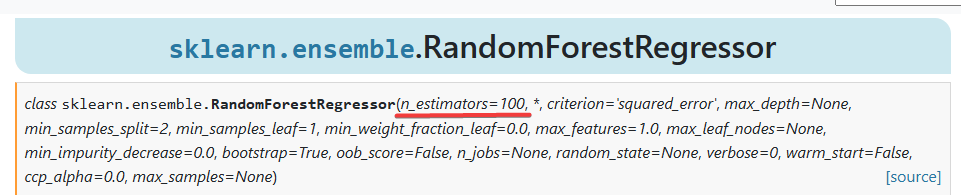



In [351]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)  # 0.8065734772187598

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

We will use 2 model in this section
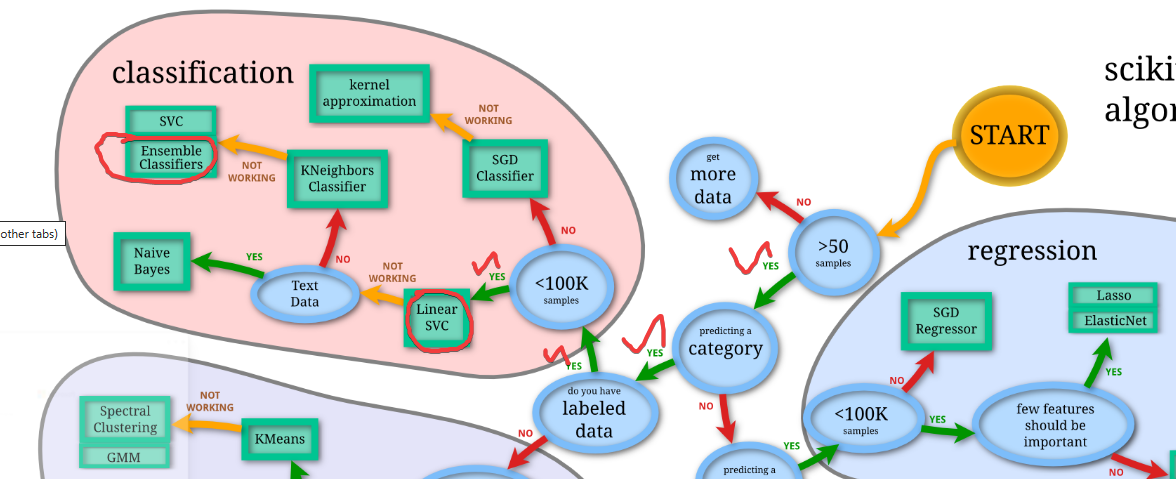

In [352]:
# Get the data (be sure to click "raw") - https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv 
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [353]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [354]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000, dual=False) # both max_iter and dual are non-mandatory. I have used to remove warning.
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

We have got 86% which is good. Now let's try a different model.

Let's try `EnsembleClassifiers`. Like `RandomForestRegressor` that we used above for regression problem, we now have 1 `RandomForestClassifier` for classification problem.

In [355]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

We have got 85% which is good.


 #### Why you didn't use other models?
 There is a tidbid in Machine Learning.
 
1. If you have structured data, used ensemble methods such as **RandomForest**
    - Why? Because it will perform well if there are patterns.
2. If you have unstructured data (images, audio, text, etc.), use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:

* `X` = features, features variables, data
* `y` = labels, targets, target variables

##### What is model.fit / clf.fit?
``clf.fit(X_train, y_train)``
- Fit is going to find patterns.
    - In simple, fit tries to see what different values of features (X) lead to different values in target (y)
- Let's say that you want to predict if there is a heart disease or not. So, you will have X which will contain the features and y which will contain the target. The target will be 1 for heart disease and 0 for not.
- When we pass X and y to `clf.fit`, it will cause the model to go through all of the samples in X and figure out the patterns that leads to 1 or 0 in y.
- *NOTE:* We use training data when trying to find patterns.
- How a model is doing this depends on the model you use. 

##### What is model.score / clf.score?
`clf.score(X_test, y_test)`
- `clf.score()`  calculates the accuracy of the classifier on the provided **test data** (X_test and y_test).
- Basically, we use testing data here to use the patterns the model has learned in `clf.fit`
- So, this is evaluating the model on the test data set.
- Behind the scenes of `score`, the model is making predictions on X_test and comparing them with y_test.

##### Figuring out what machine learning model does
- If you want to figure out what machine learning model does, use `clf.fit` that takes the training data and figure out patterns (in supervised learning, it figures out how those patterns relate to the labels) and then we can use it in `clf.score` on the test data to use the patterns that the model has learned.

In [356]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [357]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [358]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

#### predict
- The `predict()` method takes `X_test` data and predicts the labels.
- To explain more, we know that we have trained our model using our training data, `clf.fit(X_train, y_train)`. Now to make the prediction, we need to use `clf.predict` and we need to pass the test data. Note that we will only pass the features, i.e. `X_test` and the `clf.predict` will give us a result (the labels) which, of course, will be in the same format of `y_test`.

#### predict_proba
- The `predict_proba()` method returns probabilities for a classfication label
- Definition: The returned estimates for all classes are ordered by the label of classes.
    - E.g. A class would be heart disease and another class would be not heart disease. (Basically, class here referred to as labels.)
- To understand more, see the screenshot below. We have used `clf.predict` and `clf.predict_proba` on the first 5 test data. 
    - The `clf.predict` will return the label. i.e it will say 0 or 1 in the heart_disease example
    - The `clf.predict_proba` will return the probability of that label being true. 
    - See below, we know that 1 is for heart disease and 0 is for no heart disease. 
        - The `clf.predict` will directly give 1 or 0.
        - The `predict_proba` will give the probability of 0 and 1 together. In the first row, we have 0.89 and 0.11. So, we are predicting that 89% probability of 0 being true and 11% probability of 1 being true, so the prediction is 0.
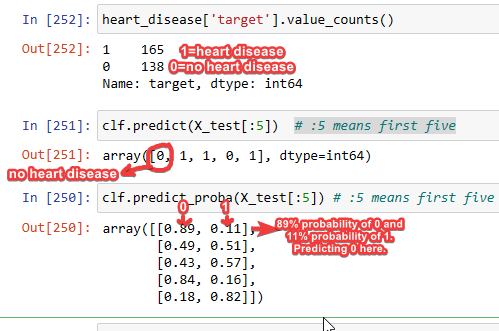
- Why use `predict_proba`?
    - In the above, we see that with `clf.predict`, we are forcing the result to be either 0 or 1.
    - But with `clf.predict_proba`, we can see the probability. 
        - See the first sample, the prediction is one 89% probability on 0 and 11% probability on 1, so we can say that the model is confident on the 1st sample.
        - See the second sample, the prediction is 49% on 0 and 51% on 1, so it is almost 50:50. We can investigate this and see why model is not so confident and fix this.
    - We just have one label in the above example, so only 2 classes (heart disease or no heart disease). If we have 10 labels, we will get probability values for each of those classes.
- When can we use `predict_proba`?
    - Let's say we are using this data in a hospital, we don't want our model to give us samples that only have 0.51. We can say it to give samples that the model is extremely confident, let's say 0.8

#### Make predictions with `predict()`

In [359]:
clf.predict(X_test)  # We have predicted the labels on our test data, this is basically the predicted results.

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [360]:
np.array(y_test)  # y_test is our "test labels" (aka truth labels or ground truth), which is basically the true results.

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [361]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)

np.mean(y_preds == y_test)  # 0.8524590163934426

0.8524590163934426

In [362]:
clf.score(X_test, y_test)  # 0.8524590163934426  

0.8524590163934426

In [363]:
# There are a few other ways to measure the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)  # 0.8524590163934426 (same result)

0.8524590163934426

`np.mean(y_preds == y_test)`,  `clf.score(X_test, y_test)` and `accuracy_score(y_test, y_preds)` gave us the exact same results, which is `0.8524590163934426`.

What we were doing is the comparing or calculating the accuracy how well the predictions (y_preds) did when compared to the ground truth (y_test)

You can do yourself manually one by one and you will see that 85% of data matched.
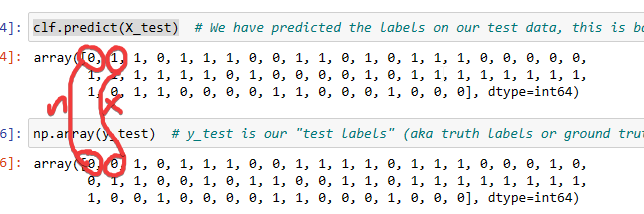

#### NOTE: 
- `clf.score()` calculates the accuracy of the classifier on the provided test data (`X_test` and `y_test`). Basically, we use testing data here to use the patterns the model has learned in clf.fit Behind the scenes of score, the model is making predictions on X_test and comparing them with y_test.
- `accuracy_score()` calculates the accuracy of the predictions (`y_preds`) compared to the true labels (`y_test`). The function only receives the true labels and the predictions as input.
- In other words, `clf.score(X_test, y_test)` tells you how well the classifier is doing on the test data, and `accuracy_score(y_test, y_preds)` tells you how well the predictions made by the classifier match the true labels.

#### Make predictions with `predict_proba()`
Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [364]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [365]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5]) # :5 means first five

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [366]:
# Let's predict() on the same data...
clf.predict(X_test[:5])  # :5 means first five

array([0, 1, 1, 0, 1], dtype=int64)

#### Making Predictions With Our Model (Regression)

In [367]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [368]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [369]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [370]:
np.array(y_test.iloc[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [371]:
# Now we need to find out the average difference between the predicted values and true values

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)  # 0.32659871732073664.

0.32659871732073664

##### What is mean_absolute_error?
- It says, on average, each one of our model predictions is 0.32 different from the actual test value
- This mean on average, y_preds on average 0.32 different on the target values

In [372]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Now we need to evaluate our model.

What happens when we evaluate our model?
- You compare its predictions to what it should have predicted (the truth labels).

Three ways to evaluate Scikit-Learn models/estimators:
1. **Estimator `score` method**: Estimator's built-in `score()` method
2. **`Scoring` parameter**: The `scoring` parameter
3. **Metric function**:Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

**Machine Learning Model Evaluation**
- Evaluating the results of a machine learning model is as important as building one.
- But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.
- Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

**Classification Model Evaluation Metrics/Techniques**
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recal**l - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
* **Classification report** - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.
* **Area Under Curve (AUC) Score** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?**
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false-positive predictions are worse than false-negatives, aim for higher precision.
* If false-negative predictions are worse than false-positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.
* A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques**
* **R^2 (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use?**
* **R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your **R2** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* **MAE** gives a better indication of how far off each of your model's predictions are on average.
* As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
* Pay more attention to MAE: When being 10,000 off is **twice** as bad as being 5,000 off.
* Pay more attention to MSE: When being 10,000 off is **more than twice** as bad as being 5,000 off.
* For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions) - https://scikit-learn.org/stable/modules/model_evaluation.html

Beyond Accuracy: Precision and Recall by Will Koehrsen - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error) - https://stackoverflow.com/a/37861832



### 4.1 Evaluating a model with the score method

Measuring the `score` for classification model and regression model

**Classification Model's `score()`**
- In simple terms, `model.score()` for a classification model tells you how well your model is able to correctly predict the class labels based on the input variables. If the score is close to 1, it means that the model is doing a good job at classifying the data, and if the score is close to 0, it means that the model is not a good fit for the data
- `model.score()` for a classification model calculates the performance of the model on the provided data. However, the default evaluation metric for classification models in scikit-learn is accuracy.
    - Accuracy is the proportion of correct predictions made by the model. It ranges from 0 to 1, where a higher value indicates a better fit.

**Regression model `score()`**
- In simple terms, `model.score()` tells you how well your model is able to predict the target variable based on the input variables. If the score is close to 1, it means that the model is doing a good job at fitting the data, and if the score is close to 0, it means that the model is not a good fit for the data.
- `model.score()` calculates the performance of the model on the provided data. The default evaluation metric for **regression models** in scikit-learn library is R-squared (or R²).
    - R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (the variable you're trying to predict) that is predictable from the independent variables. It ranges from 0 to 1, where a higher value indicates a better fit.

**What is the difference?**
- The difference between model.score() for regression and classification models is that for regression models it measures the R-squared and for classification models it measures the accuracy. Both are measures of goodness of fit but for different types of problems.

#### Let's use the `score()` on our classification problem...

In [373]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [374]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [375]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)
# getting 100% because we the model had exposure to all the training features and training labels but note that 
# we have used default n_estimators which is 1000 and that's why we got 1.0. 
# If we used less estimators then we would have got less

1.0

In [376]:
clf.score(X_test, y_test)

0.8524590163934426

We can tweat the `n_estimators` in RandomForestClassifier to experiment. By default, it is 1000.
The higher number of n_estimators the longer the model will take to fit beucase ensemble is a combination of different number of models.

In [377]:
clf = RandomForestClassifier(n_estimators=2)
clf.fit(X_train, y_train)
training_data_score = clf.score(X_train, y_train) 
test_data_score = clf.score(X_test, y_test)
print(training_data_score, test_data_score) # 0.91 0.77  # See the score has reduced because we used only 2 estimators

0.8801652892561983 0.7377049180327869


Let's undo the n_estimators to default and re-run the code

In [378]:
clf = RandomForestClassifier() # leaving blank since n_estimator is 1000 by default
clf.fit(X_train, y_train)

RandomForestClassifier()

In [379]:
clf.score(X_train, y_train)

1.0

In [380]:
clf.score(X_test, y_test)

0.8524590163934426

#### Let's use the `score()` on our regression problem...

In [381]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [382]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model using the `scoring` parameter
- We've seen how to quickly get a sniff of how our machine learning model is doing and evaluate it using the `score` method
- However, when you get further into a problem, it's likely you'll want to start using some more powerful metrics to evaluate your model's performance. So, the next step up from using score is to use a custom `scoring` parameter.

###  What is Cross-Validation?
- cross-validation is a way to split your data into multiple parts, train your model on some of the parts, and then test it on the remaining parts.
- It allows you to see how well your model is likely to perform on new, unseen data. It can be used to check the stability of the model or to choose some parameter values.
- Overall, cross-validation is a powerful technique to assess the performance of a model and to prevent overfitting  (a problem where a model performs well on the training data but poorly on new, unseen data)
- Why use cross-validation?
    - Cross-Validation aims to solve the problem of not training on all the data. In the below SS, we're creating 5 models and we end up having a model trained on all the data and avoid getting lucky scores, such as training on a single split.
    - In the below SS, 
        - LHS you can see that on the normal train & test split, we usually randomly do 80:20 split. Imagine what will happen if all of the very good data is in training split, our model will perform well on test split but that's a risk.
        - RHS you can see that we have used cross-validation with 5 folds. NOTE: You can use how many folds ever you want. Based on the number of folds, e.g. let's say 5, the model will be trained on 5 different versions of training data and evaluated on 5 different version of test data.

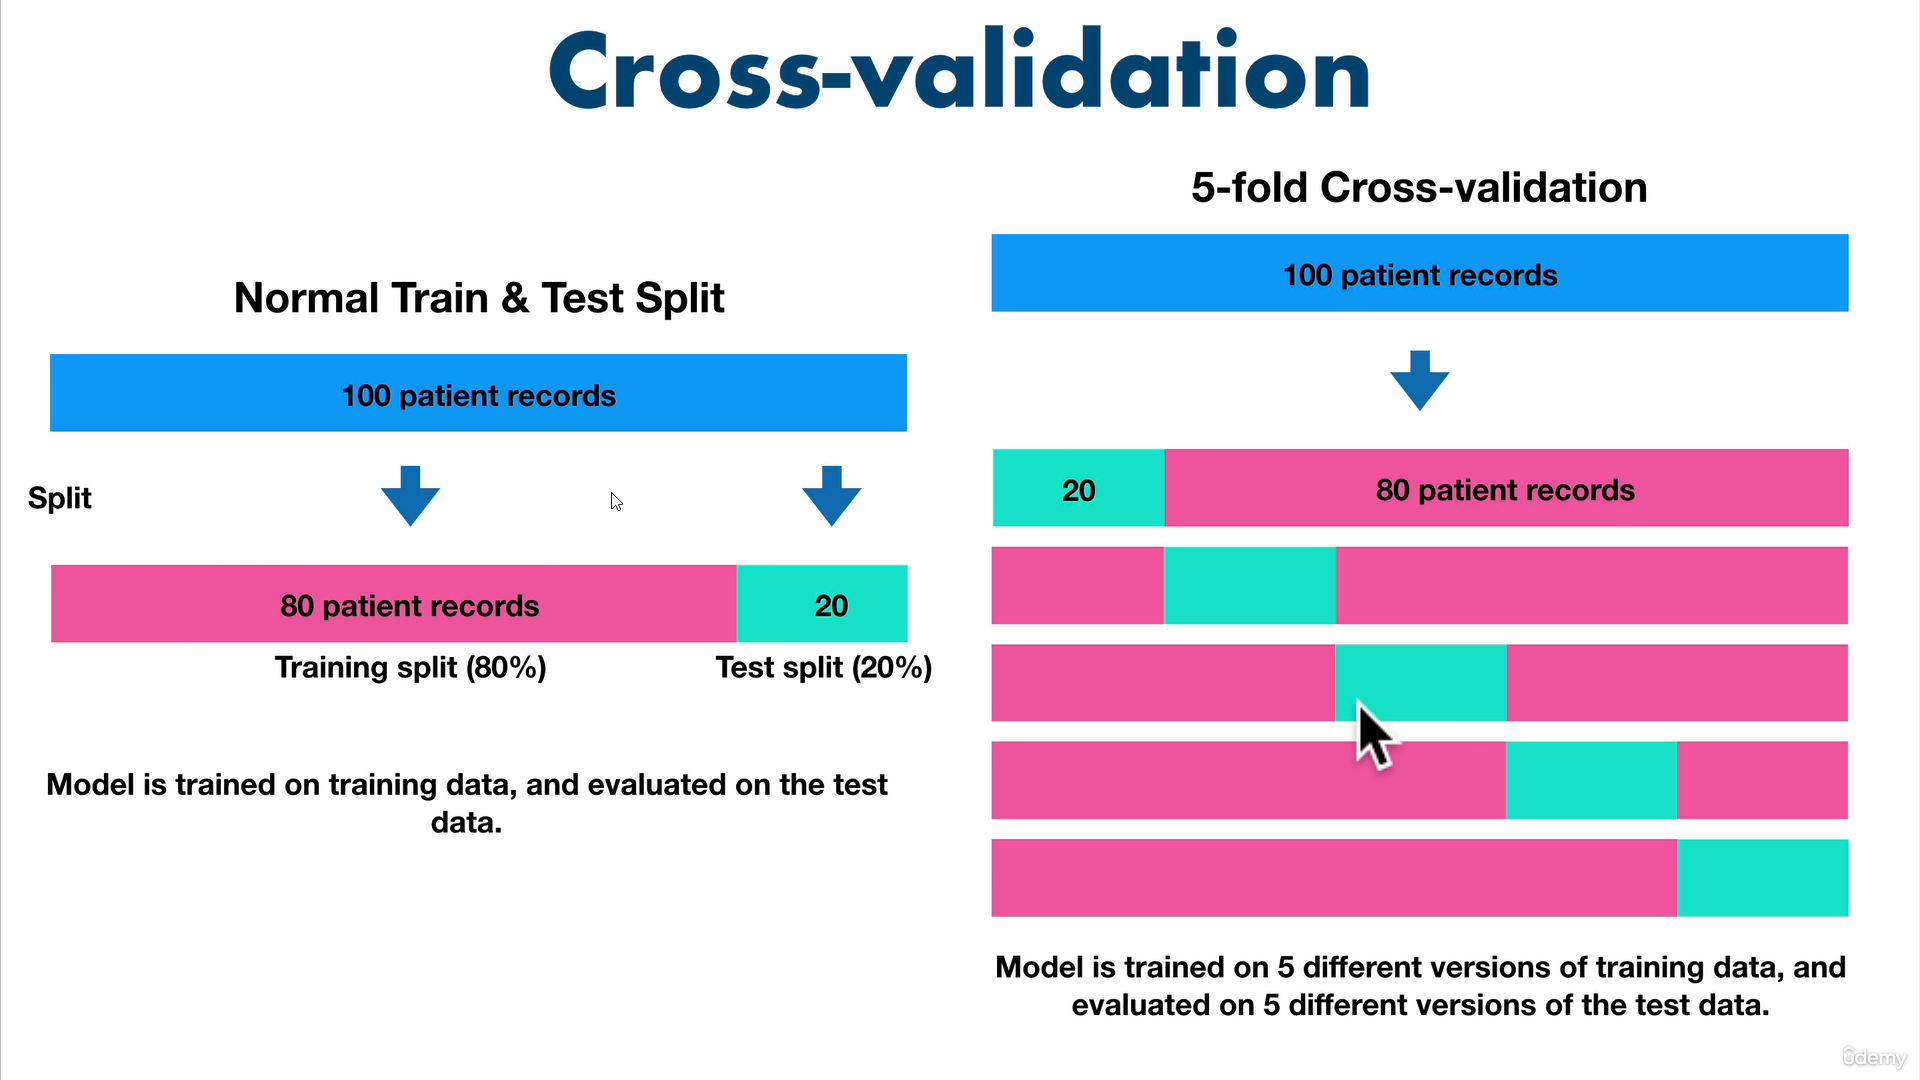

In [383]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train);

In [384]:
clf.score(X_test, y_test)

0.8524590163934426

In [385]:
cross_val_score(clf, X, y, cv=5)  # cv means cross-validation. There will be 5 different splits here.

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [386]:
cross_val_score(clf, X, y, cv=10)  #  There will be 10 different splits here.

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

Now what we can do is take the mean of those splits to see how our model is performing.

In [387]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

**NOTE**: 
- Default `scoring` parameter is set to `None` by default.
- When `scoring` is `None`, the estimator's default scorer (if available) is used.
    - Meaning, it uses the default scoring parameter of our estimator. In our case, since we are using RandomForestClassifier, the `score` method uses "mean accuracy", so the `scoring` parameter will use the mean accuracy.

### 4.2.1 Classification model evaluation metrics
It is important to get a few more different evaluation metrics.
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

The above mentioned are just the important ones. 
To know more see here - https://scikit-learn.org/stable/modules/model_evaluation.html

#### 1. Accuracy

In [388]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [389]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf=RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [390]:
np.mean(cross_val_score)

0.8248087431693989

In [391]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### 2. Area under ROC curve

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
- The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.
- The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.




Area under the Receiver Operating Characteristic (ROC) curve (AUC)

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (TPR) versus a models false positive rate (FPR).

* **True positive = model predicts 1 when truth is 1**
    - Example: In our heart disease example, True positive is when our model predicts target as 1 and the real label is also 1.
* **False positive = model predicts 1 when truth is 0**
    - Example: In our heart disease example, False positive is when our model predicts target as 1 and the real label is also 0. This gives false positive sense that a person may have heart disease.
* **True negative = model predicts 0 when truth is 0**
    - Example: In our heart disease example, True negative is when our model predicts target as 0 and the real label is also 0.
* **False negative = model predicts 0 when truth is 1**
    - Example: In our heart disease example, False negative is when our model predicts target as 0 and the real label is also 1. This gives false negative sense that a person may not have heart disease but they do have heart disease.

In [392]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [393]:
# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]  # array([[0.58, 0.42], [0.09, 0.91], [0.55, 0.45], ...])  # 0 index is negative and 1 index is positive

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [394]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [395]:
y_probs_negative = y_probs[1, :]
y_probs_negative[:10]

array([0.17, 0.83])

In [396]:
# Calculate fpr (false positive rates), tpr(true positive rates) and thresholds

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(
    y_true=y_test,  # test labels
    y_score=y_probs_positive  # probability estimates of positive class
)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

Above `fpr` gave us a big array and it doesn't make sense to looking at these on its own, so we will create a function for plotting ROC curves.

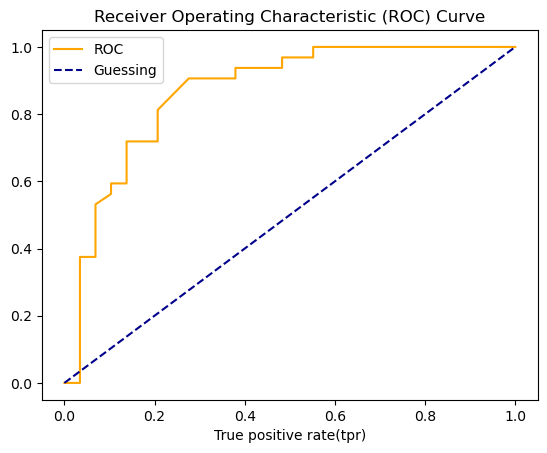

In [397]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle='--', label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.xlabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In the above ROC Curve, we can see that when the fpr is 0.6, the tpr is 1.0

The dark blue dotted line (--) going from one corner to another is guessing and our model is doing far better than guessing by getting about 80%, 82%, 85%... Can you guess where the most ideal ROC curve might end up?

This is where AUC comes into play. We need to use `roc_auc_score` to calcualte a ROC curve for your model when you want to compare the false positive versus the true positive rate. 

In [398]:
from sklearn.metrics import roc_auc_score

roc_auc_score(
    y_true=y_test, 
    y_score=y_probs_positive
)

0.8669181034482759

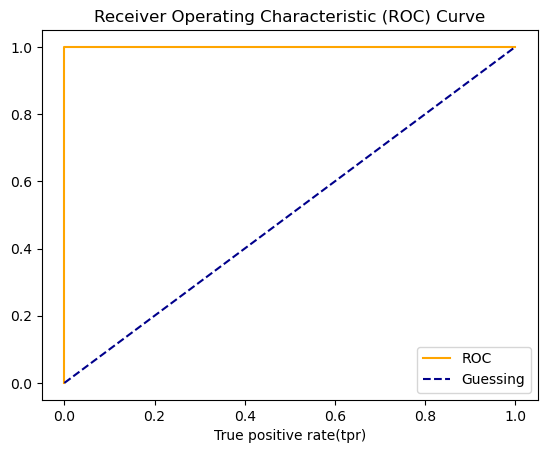

In [399]:
# Demonstration Purpose: Plotting perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [400]:
# Demonstration Purpose: Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### 3. Confusion matrix

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In the below SS, 
- We have correct values in the diagonal (top left and bottom right) where we can see that the True Positives and True Negatives 
- Top right and bottom left are showing us where our model got confused./

NOTE: In the below SS, there are only 2 labels used for demonstration purpose. You may have more labels in real life.

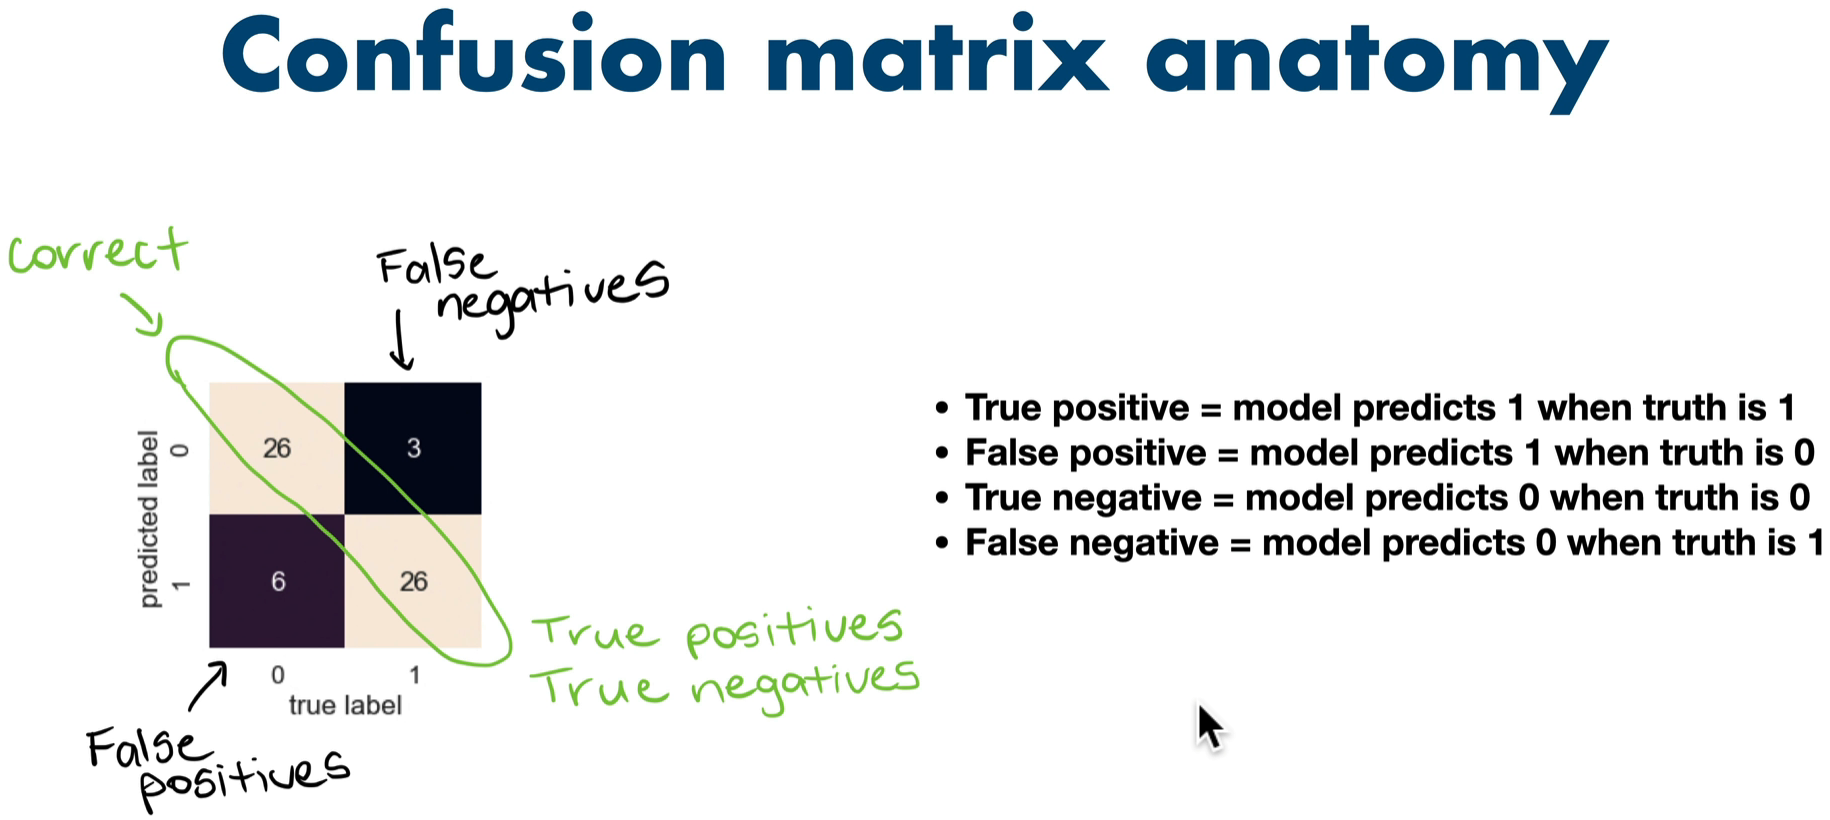

In [401]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)  # y_true, y_pred

array([[23,  6],
       [ 6, 26]], dtype=int64)

**There are 3 ways to visualize the confusion_matrix since the above output is not clear**:
1. pd.crosstab
2. ConfusionMatrixDisplay.from_estimator
3. ConfusionMatrixDisplay.from_predictions

What is the difference `pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])` and `ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)` and ?

- `crosstab` was using y_test and y_preds 
- `from_estimator` was using X and y, means with from_estimator we are passing the entire X and y data and it will make the predictions for you. You can see the numbers clearly are more here when compared to other two approaches because we are using the entire data.
- `from_predictions`, just like crosstab, uses y_test and y_preds. 

##### pd.crosstab

In [402]:
pd.crosstab(
    y_test, 
    y_preds, 
    rownames=["Actual Label"], 
    colnames=["Predicted Labels"]
)

Predicted Labels   0   1
Actual Label            
0                 23   6
1                  6  26

In [403]:
# Before we move, there are 61 samples in X_test and the count of the above mentioned numbers is also 61
len(X_test), (22+7+5+27)

(61, 61)

*Understanding what crosstab has outputted.*

When Predicted Label is 0 and Actual Label is 0, we have 22 samples which is True Negative

When Predicted Label is 1 and Actual Label is 1, we have 27 samples which is True Positive

When Predicted Label is 1 and Actual Label is 0, we have 7 samples which is False Positive

When Predicted Label is 0 and Actual Label is 1, we have 5 samples which is False Negative

With False Positive and False Negative we can see where our model is getting confused. 
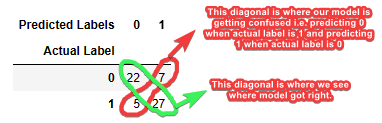

##### Creating a confusion matrix using Sklearn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. `sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)` - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. `sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)` - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> **Note**: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

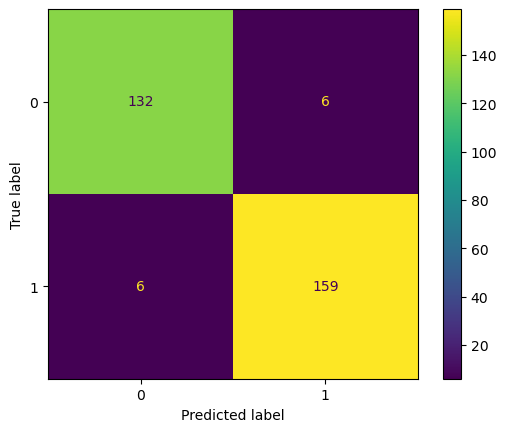

In [404]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

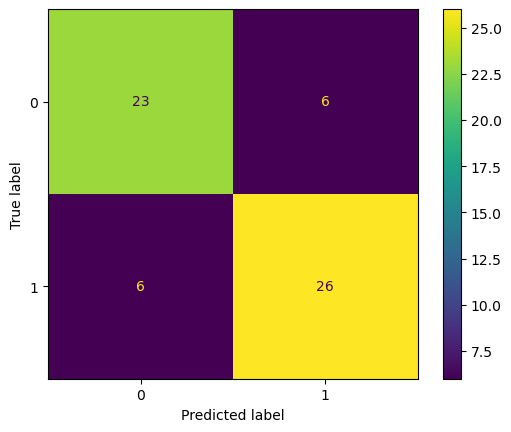

In [405]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

#### 4. Classification Report

This is also a collection of different evaluation metrics.

You will have
1. Precision -- Model that has no false positives will have 1.0
2. Recall -- Model that has no false negatives will have 1.0
3. F1 Score -- Combination of Precision and Recall. A perfect model achieves an F1 Score of 1.0
4. Support -- Total number of samples each metric was calculated on. E.g. Below you see label "0" class was calculated on 29 samples, label "1" class was calculated on 32 samples and others were calculated on 61 samples.
5. accuracy -- accuracy of model. This is just like the `accuracy_score` we've used earlier.
6. macro avg -- average precision, recall and F1 score between classes. Note: Macro avg doesn't take class imbalance into account. 
    What is class imbalance? In the below SS, we don't have class imbalance. Class imbalance will be something like, label "0" class has 60 samples and label "1" class 1 sample. If you have class imbalance, check the "macro avg"
7. Weighted avg -- the weighted average, precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class (e.g. will give a high value when one class out performs another due to having more samples). 

To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

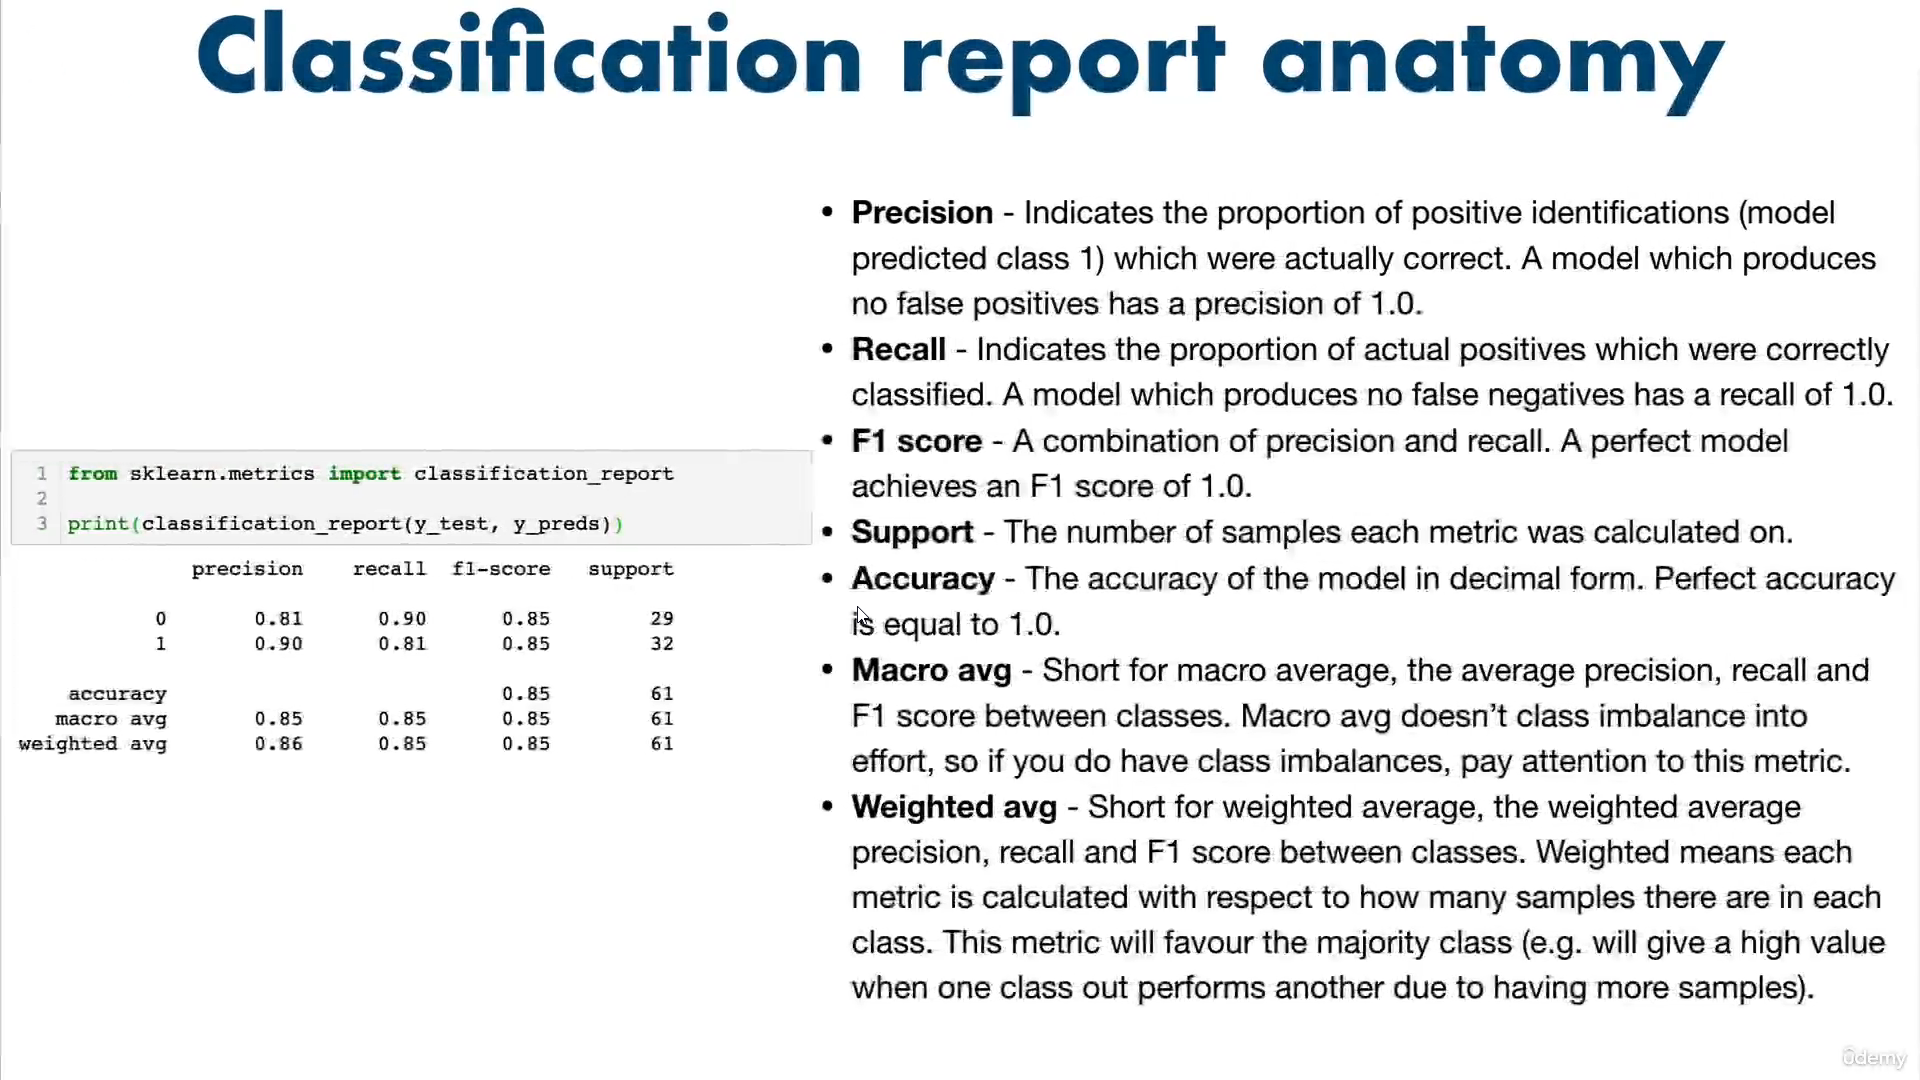


In [406]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



**See below where `precision` and `recall` becomes valuable**
- Imagine a situation where you have 10000 people and only one of them had a disease and you're asked to build a model to predict who has it. If you see below, that's what we have demonstated in the code. 10000 0's and only one 1 which is at 0th index.
- Now when you build classification_report, you can see all the details.
- Notice the accuracy, it says 99% if we were to measure just accuracy on our model. This is why we use other metrics, see that the macro avg, it says precision as 49%, recall as 50% and f1-score as 49%. Also you can see the class 0's precision is 99% but class 1's precision is 0% and so is for recall and f1-score. 
- This is why you need to use other metrics for evaluating your model and not just accuracy.

In [407]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(
    classification_report(
        disease_true,
        disease_preds,
        output_dict=True,
        zero_division=0
    )
)

0.0  1.0  accuracy     macro avg  weighted avg
precision     0.99990  0.0    0.9999      0.499950       0.99980
recall        1.00000  0.0    0.9999      0.500000       0.99990
f1-score      0.99995  0.0    0.9999      0.499975       0.99985
support    9999.00000  1.0    0.9999  10000.000000   10000.00000

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)



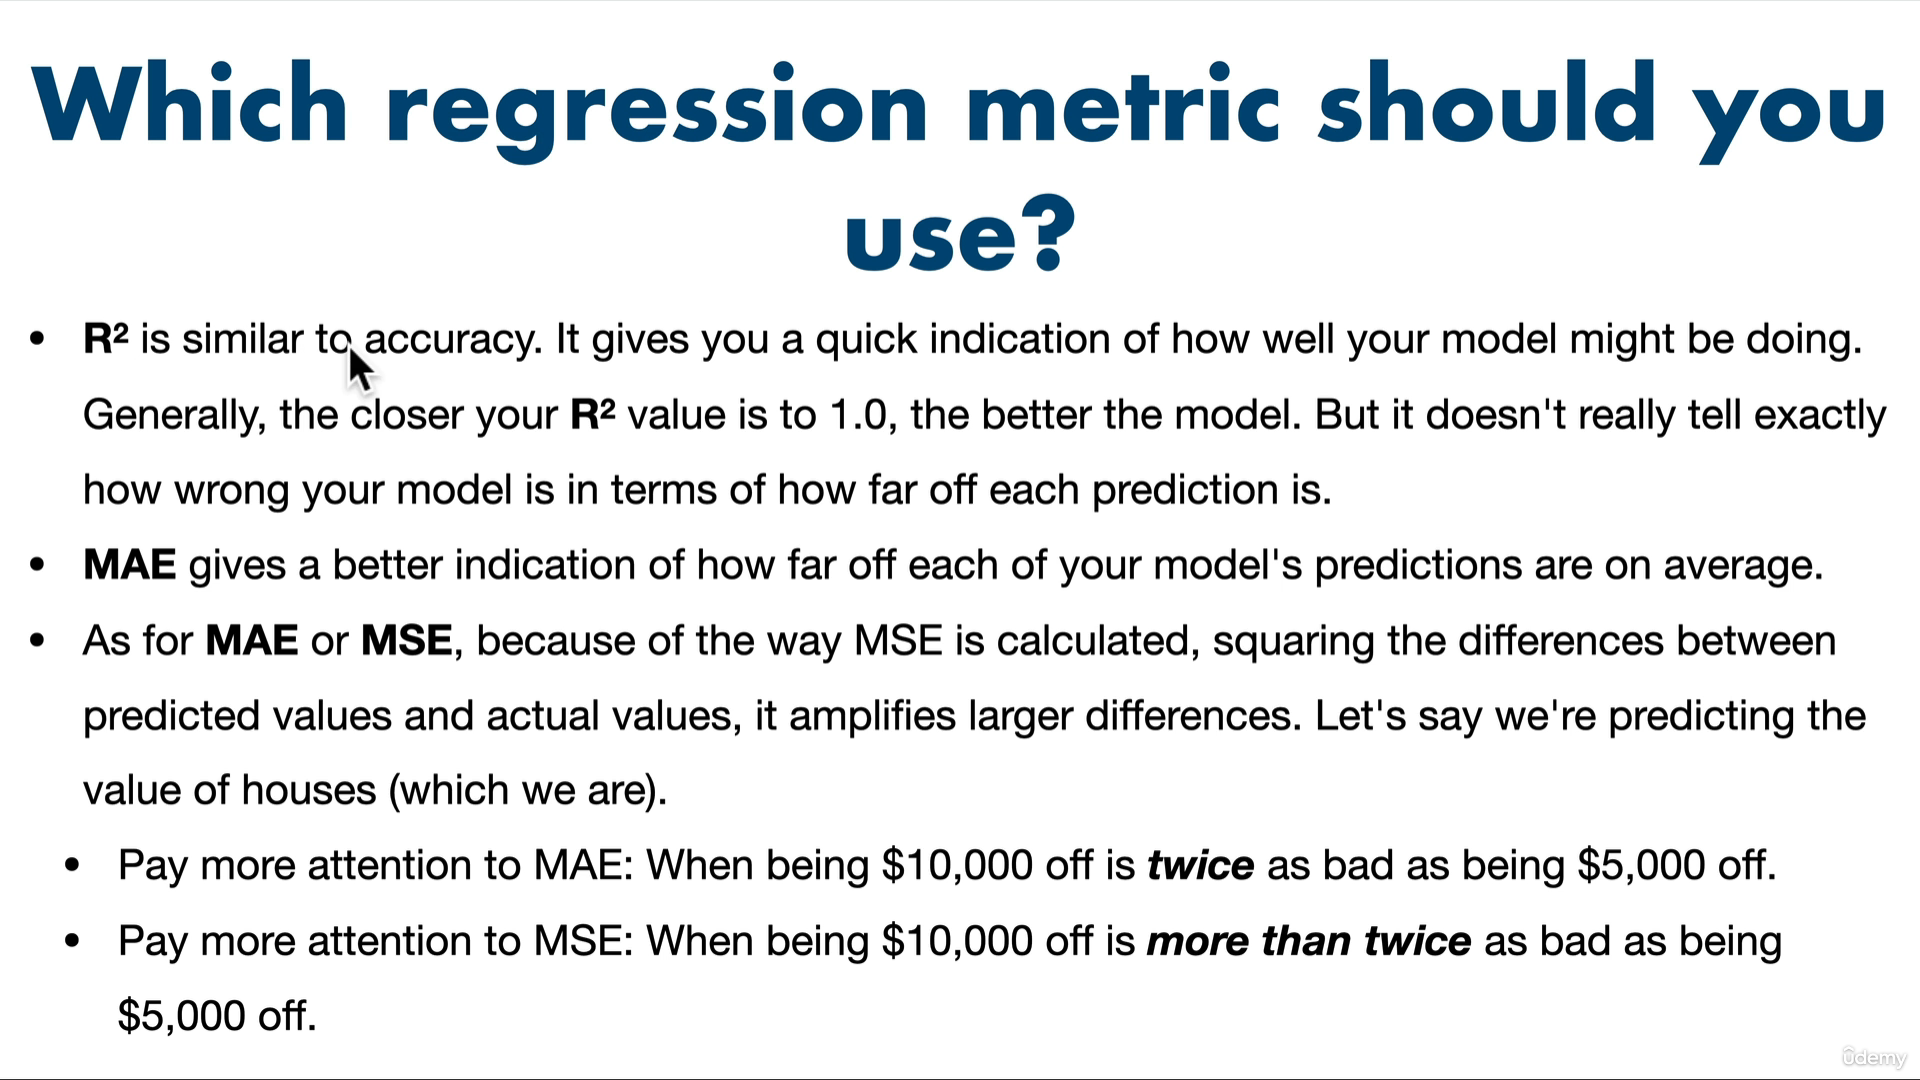


- In general, MSE is more sensitive to outliers than MAE, because it squares the differences. So, if you want to penalize large errors more heavily, you would use MSE. If you want a more robust measure, you would use MAE.
- Depending on what is more important for the problem at hand, you may want to pay more attention to MAE or MSE. If the difference between 10,000 and 5,000 is not that significant, you can pay more attention to MAE. If the difference is significant and you want to penalize the larger difference more, you can pay more attention to MSE.

#### R^2 (pronounced r-squared) or coefficient of determination
What R-squared does?
- Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 
- For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Example
- Below we see that we are going to use `model.score` of regression which returns the "coefficient of determination of the prediction. We already saw that "coefficient of determination" is R^2 which is how much the dependent (target) variable can be predicted from the independent (feature) variable.
- The highest value for R^2 is 1.0 but the lowest value can be in negative. 
- Below you see that y_test.mean()'s value is 2.0550030959302323. Let's say that our model has predicted the same 2.0550030959302323 for all the y_test, then R^2 would be 0.0. and if it predicted the y_test perfectly, it would get score of 1.0.



In [408]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [409]:
model.score(X_test, y_test)

0.8065734772187598

In [410]:
# Question: How much of the target (dependent) variable can be predicted by the feature (independent) variables?
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [411]:
y_test.mean()

2.0550030959302323

In [412]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean for demo purpose that contains array full of mean of y_test
y_test_mean = np.full(len(y_test), y_test.mean())

In [413]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [414]:
# If the model was just to predict the mean, then we should get R^2 of 0.0
r2_score(
    y_true=y_test,
    y_pred=y_test_mean
)

0.0

In [415]:
# If the model was predicted perfectly, then we should get R^2 of 1.0
r2_score(
    y_true=y_test,
    y_pred=y_test
)

1.0

#### **Mean absolute error (MAE)**
- MAE is the average of the "absolute" differences between predictions and actual values.
- It gives you an idea of how wrong your models predictions are.
- Here's what it does:
    - Takes the `(actual values - predicted values)`
    - Takes the `absolute` of that (meaning -ve will become positive)
    - Takes the `mean`.
    
- Anyways, Below example you can see that MAE for y_test and y_preds is 0.32 which means each one of our y_preds is 0.32 + or - y_test value.

In [416]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [417]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [418]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [419]:
# For more visualization to see the differences
df = pd.DataFrame(
    data={
        "actual values (y_test)": y_test,
        "predicted values (y_preds)": y_preds
    }
)

df['differences'] = df['predicted values (y_preds)'] - df['actual values (y_test)']

df.head(10)

actual values (y_test)  predicted values (y_preds)  differences
20046                 0.47700                    0.493840     0.016840
3024                  0.45800                    0.754940     0.296940
15663                 5.00001                    4.928596    -0.071414
20484                 2.18600                    2.543160     0.357160
9814                  2.78000                    2.331760    -0.448240
13311                 1.58700                    1.652530     0.065530
7113                  1.98200                    2.343230     0.361230
7668                  1.57500                    1.661820     0.086820
18246                 3.40000                    2.474890    -0.925110
5723                  4.46600                    4.834478     0.368478

If we take the average of df['differences'] then we get a different value of 0.012 from the above 0.326.

Reason: mean_absolute_error gets rid of the negative values whereas mean() will include the negative values.

In [420]:
# If we take the average of df['differences'] then we get a different value of 0.012 from the above 0.326
df['differences'].mean()

0.012048392126937589

If we take the absolute then it will be same.

In [421]:
# Calculate MAE by hand
np.abs(df['differences']).mean()  # this is the formula of mean_absolute_error

0.32659871732073664

#### Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

If the differences of the means are much larger than the rest, the MSE number will be up. If the model did quite well, then MSE will get good value like below 0.25.

In [422]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [423]:
df["squared_differences"] = np.square(df["differences"])
df.head()

actual values (y_test)  predicted values (y_preds)  differences  \
20046                 0.47700                    0.493840     0.016840   
3024                  0.45800                    0.754940     0.296940   
15663                 5.00001                    4.928596    -0.071414   
20484                 2.18600                    2.543160     0.357160   
9814                  2.78000                    2.331760    -0.448240   

       squared_differences  
20046             0.000284  
3024              0.088173  
15663             0.005100  
20484             0.127563  
9814              0.200919

In [424]:
df.head()

actual values (y_test)  predicted values (y_preds)  differences  \
20046                 0.47700                    0.493840     0.016840   
3024                  0.45800                    0.754940     0.296940   
15663                 5.00001                    4.928596    -0.071414   
20484                 2.18600                    2.543160     0.357160   
9814                  2.78000                    2.331760    -0.448240   

       squared_differences  
20046             0.000284  
3024              0.088173  
15663             0.005100  
20484             0.127563  
9814              0.200919

In [425]:
 # Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2534678520824551

In [426]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

In [427]:
df_large_error.head()

actual values (y_test)  predicted values (y_preds)  differences  \
20046                 0.47700                    0.493840     0.016840   
3024                  0.45800                    0.754940     0.296940   
15663                 5.00001                    4.928596    -0.071414   
20484                 2.18600                    2.543160     0.357160   
9814                  2.78000                    2.331760    -0.448240   

       squared_differences  
20046            16.000000  
3024              0.088173  
15663             0.005100  
20484             0.127563  
9814              0.200919

In [428]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()  # Hasn't change much.

0.2573437523766412

In [429]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

actual values (y_test)  predicted values (y_preds)  differences  \
20046                 0.47700                    0.493840     0.016840   
3024                  0.45800                    0.754940     0.296940   
15663                 5.00001                    4.928596    -0.071414   
20484                 2.18600                    2.543160     0.357160   
9814                  2.78000                    2.331760    -0.448240   
...                       ...                         ...          ...   
15362                 2.63300                    2.220380    -0.412620   
16623                 2.66800                    1.947760    -0.720240   
18086                 5.00001                    4.836378    -0.163632   
2144                  0.72300                    0.717820    -0.005180   
3665                  1.51500                    1.679010     0.164010   

       squared_differences  
20046            16.000000  
3024             20.000000  
15663            20.000000  
20484            20.000000  
9814             20.000000  
...                    ...  
15362             0.170255  
16623             0.518746  
18086             0.026775  
2144              0.000027  
3665              0.026899  

[4128 rows x 4 columns]

In [430]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7334180712088106

### 4.2.3 Using the `scoring` parameter

What is cross_validation?
* Cross Validation is splitting our data into multiple train and test data sets and then evaluating or training a single model on one particular train and evaluating it on that test set and that repeating that for a number of times. We should get different scores for each different splits and then we can take the average of that to see how our model went across those different splits.
* Example, let's say we have set up 5 fold cross validation (see `cv=5`) which means it is going to split X and y into 5 different train and test splits. Train a model on 5 different training sets and evaluate the model on 5 different test sets that are associated with each training set.

#### `scoring` parameter used for classification problem

**Let's pass `scoring="None"` and you will see the default scorer, i.e. `accuracy`, since it is classification model, being used**

In [434]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [437]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc   # you get 5 arrays because you have given cv=5

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [438]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


**Let's pass `scoring="accuracy"` and compare the score**

In [439]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, )
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [440]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


**Let's pass `scoring="precision"` and compare the score**

In [441]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [446]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


Above you see the 5 different splits results for `scoring="precision"`. The index 1 has given 0.93 and index 4 has given 0.76. This means, depending on the split of the data, our model performs better on one split than another. 

Imagine if we had only split our data and tested it on the index 1 subset, we might think the model is performing far better. However, if we had tested on index 4 subset, then we might think the model is not performing better. 

This is the value of cross-validation. That's the kind of difference if you were reporting how well your model was performing with precision. You can get a better picture idea of how your model is performing across multiple different sets of data 

**Let's pass `scoring="recall"` and compare the score**

In [447]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [448]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


With `scoring="recall"`, we see the numbers are a bit close to each when compared to `scoring="precision"`

#### `scoring` parameter used for a regression problem

**Let's pass `scoring="None"` and you will see the default scorer, i.e. R^2, since it is regression model, being used**

In [456]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing['target']

model = RandomForestRegressor(n_estimators=100)

In [457]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [458]:
np.mean(cv_r2)

0.6545458023124507

**Let's pass `scoring="neg_mean_absolute_error"` and `scoring="neg_mean_squared_error"`**

- All scorer objects follow the convention that **higher return values are better than lower return values**. Meaning, higher the value the better the model. 
- Mertics which measure the distance between the model and data, like metrics.mean_squared_error, are available as `neg_mean_squared_error` which return the negated value of the metric.
- Below you see that you will get the scores in minus. The lower the score, the better the model is performing, e.g. -0.40 is performing better than -0.55

In [466]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.55046838, -0.40979144, -0.4399356 , -0.46307245, -0.47428544])

In [467]:
np.mean(cv_mae)

-0.4675106615552327

In [468]:
# Mean Squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.50484322, -0.3478995 , -0.37263222, -0.43859572, -0.46140755])

In [469]:
np.mean(cv_mse)

-0.4250756435172248

### 4.3 Using different evaluation metrics as Scikit-learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

**Evaluation `Classification` Models**

In [471]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Evaluation `Regression` Models**

In [472]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving A Machine Learning Mode

**First predictions = baseline predictions.** 

**First model = baseline model.**

*How do improve the prediction and model?*

2 ways:
1. From a data perspective:
    - Could we collect more data? (generally, the more data, the better)
    - Could we improve our data? (may be, more features variables, etc.)
2. From a model perspective:
    - Is there a better model we could use?
    - Could we improve the current model?
        * Hyperparameters vs. Parameters -- we can adjust the hyperparameters to improve the model performance
            - Parameters = **model find these** patterns in data
            - Hyperparameters = settings on a model **you** can adjust to (potentially) improve its ability to find patterns
                - **3 ways to adjust hyperparameters**:
                    1. By hand
                    2. Randomly with RandomSearchCV
                    3. Exhaustively with GridSearchCV

In [475]:
# Finding models hyperparameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

To know more about each one of those hyperparameters, you can read here - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### 5.1 Tuning Hyperparameters by hand

Important analogy in Machine Learning is dividing our test data into 3 sets: 
1. Training, 
2. Validation and 
3. Test.

**Validation** set is where we will tune our model aka hyperparameters get tuned on this validation split.


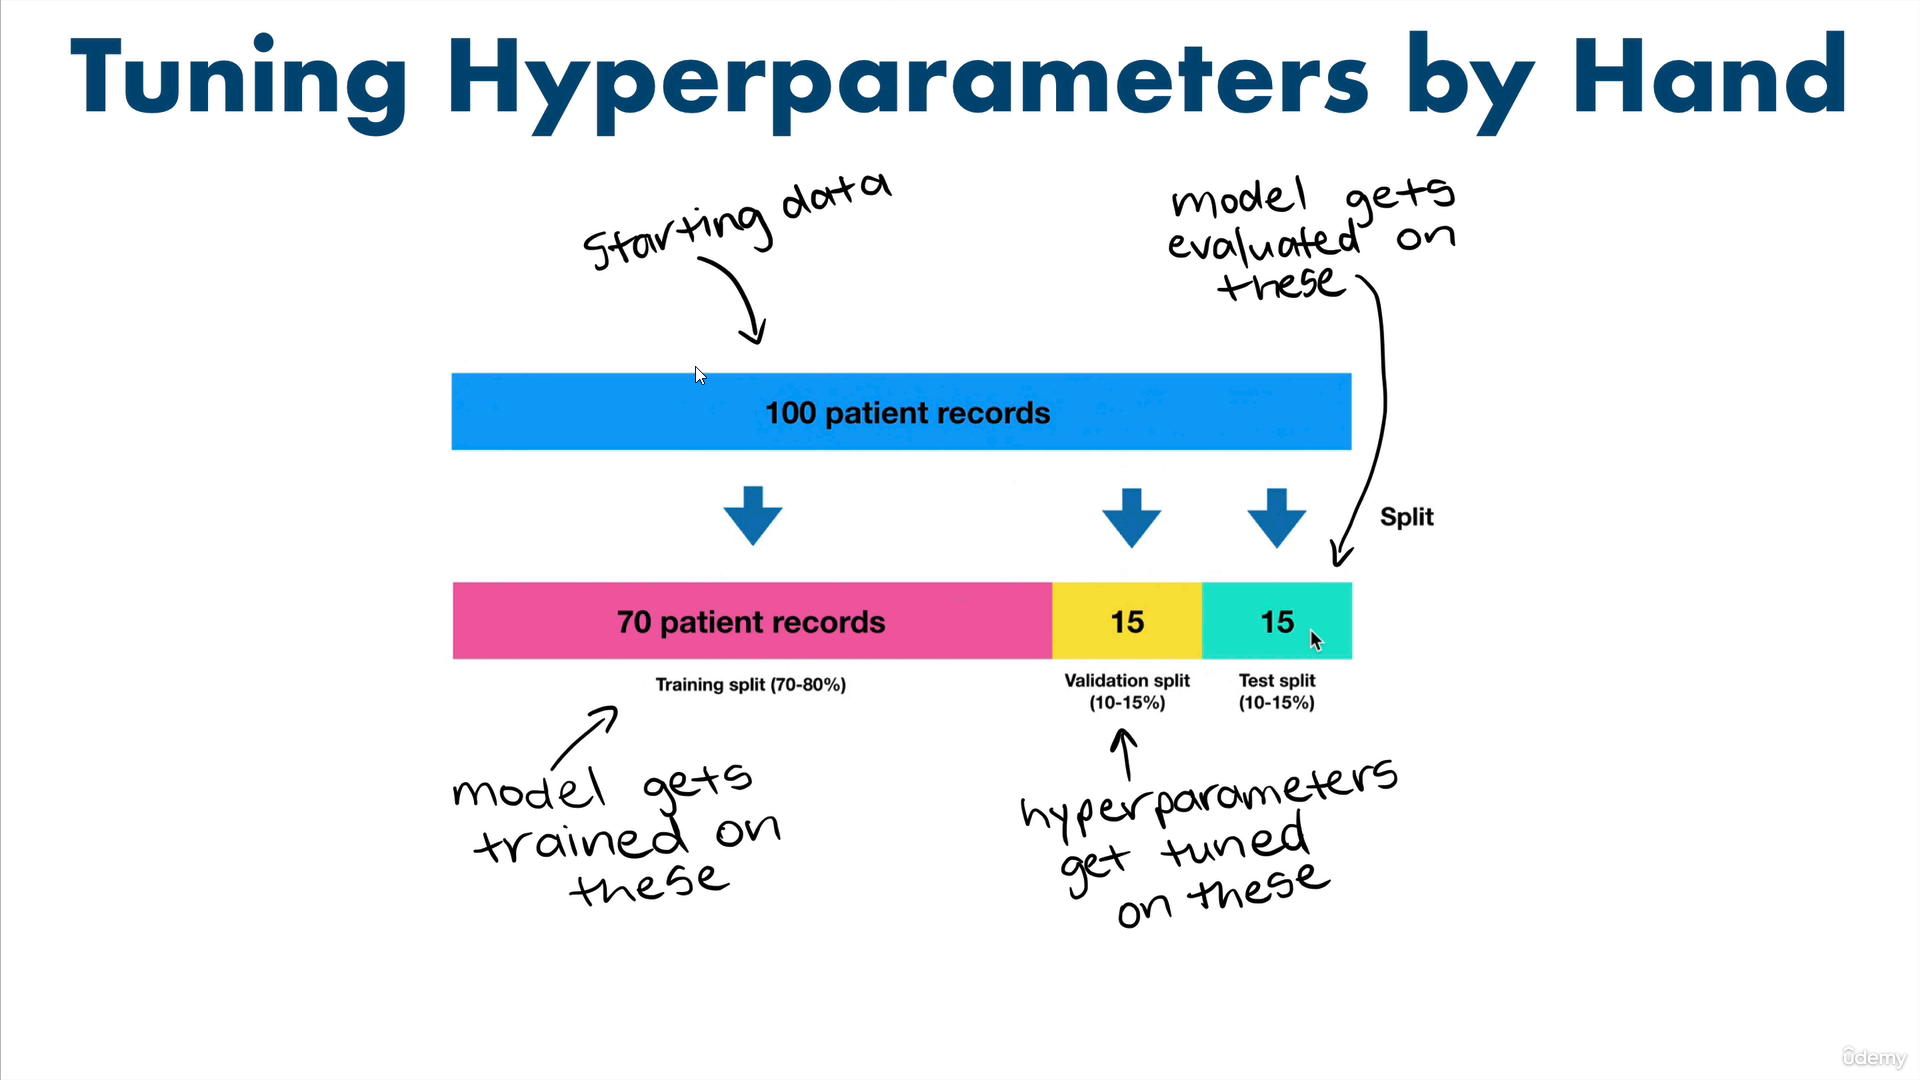 

The reason is explained below with an example:
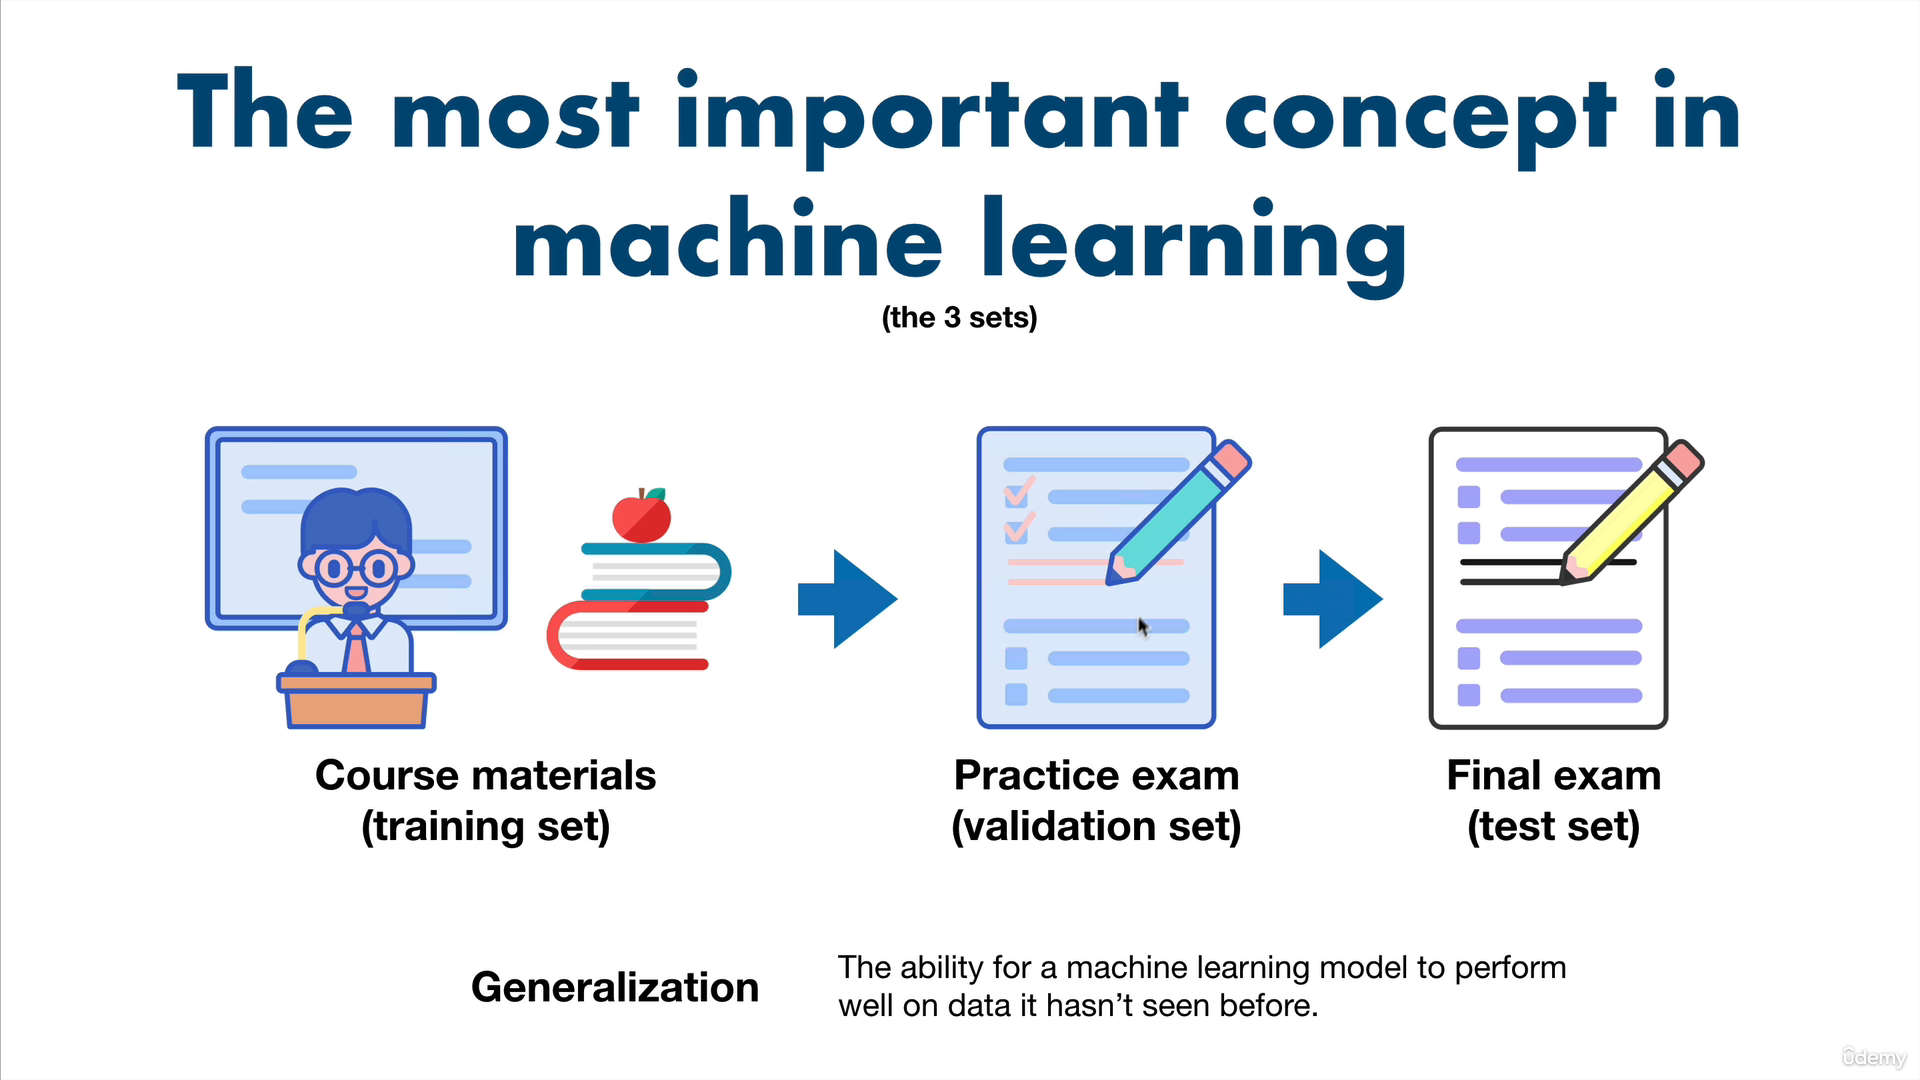

In [476]:
# Let's see all the hyperparameters first
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

Since we are going to be evaluating a few models, it's important we create an evaluation function

In [491]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

`train_test_split` splits the data into train and test sets.

We need to **manually split** the data into training, validation and test sets.

The `heart_disease` data is in dataframe, we should be able to do it using indexes.

In [492]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

**Instantiating `RandomForestClassifier` with default baseline hyperparameters**

In [498]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data since we are splitting the data
heart_disease_shuffled = heart_disease.sample(frac=1)  # frac=1 means 100%. "sample" will shuffle the data

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X.iloc[:train_split], y.iloc[:train_split]
X_valid, y_valid = X.iloc[train_split:valid_split], y.iloc[train_split:valid_split]
X_test, y_test = X.iloc[valid_split:], y.iloc[valid_split:]

# print(len(X_train), len(X_valid), len(X_test))  # (212, 45, 46)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

**Adjusting hyperparameters with new classifier (model) but different data**
- new classifier (model) I mean is we are instantiating RandomForestClassifier again
- In the below code, we are just adjusting the n_estimators hyperparameter, but the score hasn't change much and that's because n_estimators is using 1000 by default. The point is, we can adjust the hyperparameters to increase the model performance.

In [501]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=5000)  # changing `n_estimators`
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85
